<a href="https://colab.research.google.com/github/tanriders/Medical_-5-CNN_Architectures/blob/main/DS_Medical__5_CNN_Architectures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **5 CNN Architectures for Image Classification**

เป็นการรวม implementation ของเทคนิค image classification ต่างๆ โดยใช้ tensorflow 2.x เเละ keras ซึ่งมีการแสดงผล

* การเทรนเเละทดสอบบน CIFAR10 ของ keras dataset จำนวน trainset 15,000 รูป เเละ testset 1,000 รูป  https://www.cs.toronto.edu/~kriz/cifar.html
* เทรนจำนวน 5 epochs เท่ากันเพื่อเปรียบเทียบผล

**ปล.เนื่องจากใช้รูปเเละ epochs ในการเทรนน้อย รวมถึงบางโมเดลมีการเรียกใช้ pre-trained weight ซึ่งทำให้ได้เปรียบว่าโมเดลอื่น ผลที่ได้จึงอาจจะไม่ใช่ผลลัพธ์ที่เเท้จริงที่เเต่ละโมเดลทำได้**

# Import Library

เตรียมโมดูลและไลบรารีที่จะถูกใช้ในการสร้างและฝึกโมเดลปัญญาประดิษฐ์และประมวลผลรูปภาพด้วย TensorFlow และ Keras ซึ่งเป็นเครื่องมือสำคัญสำหรับการทำงานด้าน deep learning และ computer vision ใน Python

1. **import tensorflow as tf**: นำเข้าไลบรารี TensorFlow ซึ่งเป็นไลบรารีสำหรับการสร้างและฝึกโมเดลปัญญาประดิษฐ์ (artificial neural networks) และการทำงานด้าน machine learning และ deep learning.

2. **import numpy as np**: นำเข้าไลบรารี NumPy ซึ่งเป็นไลบรารีสำหรับการทำงานกับข้อมูลตัวเลขแบบหลายมิติ และมีความสำคัญในการดำเนินการกับข้อมูลที่ใช้ในการฝึกและทดสอบโมเดล.

3. **import pickle**: นำเข้าไลบรารี pickle ซึ่งใช้สำหรับการอ่านและเขียนข้อมูล Python ไปยังและจากไฟล์ในรูปแบบของ binary.

4. **import cv2**: นำเข้าไลบรารี OpenCV (Open Source Computer Vision Library) ซึ่งเป็นไลบรารีสำหรับการประมวลผลภาพและวิดีโอ.

5. **import matplotlib.pyplot as plt**: นำเข้าไลบรารี Matplotlib ซึ่งเป็นไลบรารีสำหรับการสร้างกราฟและแสดงข้อมูลแบบกราฟิก เช่น แสดงรูปภาพ.

6. **from tensorflow.keras.layers import ...**: นำเข้าคลาสและฟังก์ชันที่ใช้สร้างและกำหนดค่าชั้น (layers) ของโมเดลปัญญาประดิษฐ์ด้วย TensorFlow และ Keras (Keras เป็น API ที่ช่วยให้เราเขียน Deeplearning ได้ง่ายขึ้น ตัวของมันอยู่บน Tensorflow อีกที)

    1. **Input:** คลาส Input ใช้ในการกำหนดขนาดและรูปแบบของข้อมูลนำเข้าที่จะถูกใช้ในโมเดล โดยระบุรูปร่างของข้อมูล (shape) และคุณสมบัติอื่น ๆ เช่น ชนิดข้อมูล

    2. **Dense:** คลาส Dense แทนชั้นแบบ fully connected ในโมเดล ที่มีการเชื่อมต่อกับทุกโหนดในชั้นก่อนหน้า ซึ่งเป็นชั้นที่มีความสำคัญในการทำนายผลลัพธ์

    3. **Conv2D:** คลาส Conv2D แทนชั้นคอนโวลูชัน (convolutional layer) ในโมเดล ซึ่งใช้สำหรับการคัดลอกคุณลักษณะจากรูปภาพและจัดการกับภาพเพื่อหาคุณลักษณะเด่น

    4. **MaxPooling2D:** คลาส MaxPooling2D (max-pooling layer) ค่าสูงสุดจาก Pool size ในโมเดล ซึ่งใช้ในการลดขนาดของรูปภาพที่สำคัญในการลดการคำนวณ

    5. **AveragePooling2D:** คลาส AveragePooling2D (average-pooling layer) ในโมเดล คล้ายกับ MaxPooling2D แต่ใช้ค่าเฉลี่ยของรูปภาพย่อยแทนค่าสูงสุด

    6. **ZeroPadding2D:** คลาส ZeroPadding2D ใช้ในการเพิ่มขอบที่มีค่าเป็นศูนย์ (zero-padding) รอบรูปภาพ เพื่อปรับขนาดและรูปแบบของรูปภาพ

    7. **Dropout:** คลาส Dropout ใช้ในการลด overfitting โดยปิดการใช้งานโหนดบางโหนดในชั้นก่อนหน้าในระหว่างการฝึกโมเดล

    8. **Flatten:** คลาส Flatten ใช้ในการแปลงข้อมูลแบบหลายมิติ เช่น รูปภาพเป็นข้อมูลแบบเวกเตอร์ (vector) เพื่อนำเข้าในชั้น Dense

    9. **Concatenate:** คลาส Concatenate ใช้ในการรวมข้อมูลจากหลายชั้น (layers) โดยให้ข้อมูลถูกต่อกันในมิติที่กำหนด

    10. **Reshape:** คลาส Reshape ใช้ในการเปลี่ยนรูปแบบของข้อมูล เช่น การเปลี่ยนขนาดข้อมูล

    11. **Activation:** คลาส Activation ใช้ในการเพิ่มฟังก์ชัน activation function ไปยังชั้นของโมเดล เช่น ReLU, sigmoid, หรือ softmax

    12. **BatchNormalization:** คลาส BatchNormalization ใช้ในการปรับปรุงการคลาดเคลื่อนและเร่งความเร็วในการฝึกโมเดลโดยปรับค่าข้อมูลในแต่ละชั้นในรอบการฝึกอบรม

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report
import pickle
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, AveragePooling2D,GlobalAveragePooling2D, ZeroPadding2D, Dropout, Flatten, Concatenate, Reshape, Activation, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical


# Preparing Dataset

**ฟังก์ชัน tf.keras.datasets.cifar10.load_data()**

เป็นฟังก์ชันที่ใช้ใน TensorFlow สำหรับการโหลดชุดข้อมูล CIFAR-10 โดยใช้ Keras API ของ TensorFlow โดยเฉพาะ โดย CIFAR-10 เป็นชุดข้อมูลที่ใช้ในงานสำหรับการจำแนกประเภทรูปภาพ ซึ่งประกอบด้วยรูปภาพสีขนาด 32x32 พิกเซลที่ถูกแบ่งออกเป็น 10 ประเภทหลัก แต่ละประเภทมีรูปภาพจำนวน 6,000 รูป รวมทั้งหมด 60,000 รูป

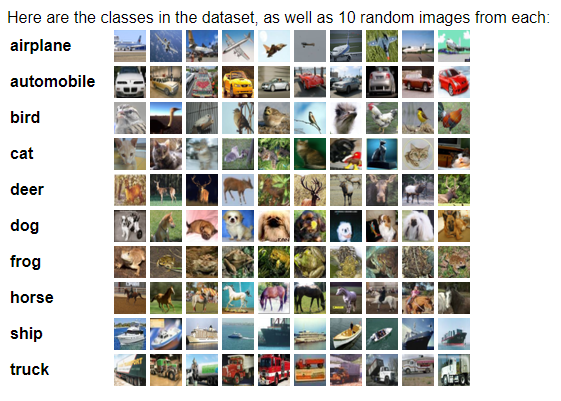

โค้ดนี้จะโหลดชุดข้อมูล CIFAR-10 และแบ่งเป็นชุดข้อมูล train และชุดข้อมูล test

 * ชุดข้อมูล train ประกอบด้วยรูปภาพจำนวน 50,000 รูป  
 * ชุดข้อมูล test ประกอบด้วยรูปภาพจำนวน 10,000 รูป

 ทุกภาพมีขนาด 32x32 พิกเซลและแต่ละป้ายกำกับ (labels) เป็นจำนวนเต็มระหว่าง 0 ถึง 9 แทนหนึ่งใน 10 ประเภท เช่น "เครื่องบิน," "รถยนต์," "นก," เป็นต้น

In [ ]:
# โหลดชุดข้อมูล CIFAR-10
(Xtrain, Ytrain), (Xtest, Ytest) = tf.keras.datasets.cifar10.load_data()

# ตอนนี้ชุดข้อมูลถูกโหลดลงในตัวแปรดังนี้:
# - Xtrain: อาร์เรย์ของรูปภาพในชุดฝึกอบรม (train_images)
# - Ytrain: อาร์เรย์ของป้ายกำกับที่เกี่ยวข้องกับรูปภาพในชุดฝึกอบรม (train_labels)
# - test_images: อาร์เรย์ของรูปภาพในชุดทดสอบ (test_images)
# - test_labels: อาร์เรย์ของป้ายกำกับที่เกี่ยวข้องกับรูปภาพในชุดทดสอบ (test_labels)

# สามารถพิมพ์รูปร่างเพื่อดูขนาดของข้อมูลที่โหลด

print(Xtrain.shape, Ytrain.shape)
print(Xtest.shape, Ytest.shape)

170498071/170498071 [==============================] - 14s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


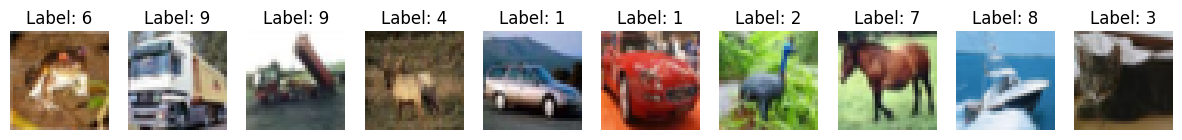

In [ ]:
# ตัวอย่างแสดงรูปภาพ 10 รูปแรกจาก Xtrain พร้อมป้ายกำกับ
fig, axes = plt.subplots(1, 10, figsize=(15, 3))

for i in range(10):
    axes[i].imshow(Xtrain[i])  # แสดงรูปภาพ
    axes[i].set_title(f'Label: {Ytrain[i][0]}')  # แสดงป้ายกำกับ
    axes[i].axis('off')  # ปิดแกนตำแหน่ง (axis) บนกราฟ

plt.show()

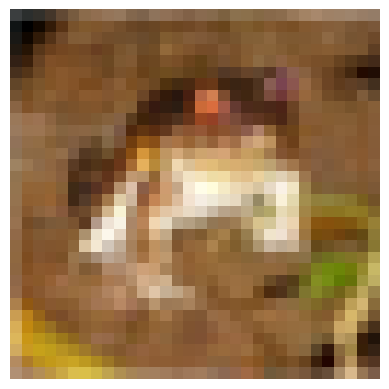

Label: [6]
sixe:  (32, 32, 3)
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [ ]:
# แสดงรูปภาพ Xtrain ตัวที่ 1
plt.imshow(Xtrain[0])
plt.axis('off')  # ปิดแกนตำแหน่ง (axis) บนกราฟ
plt.show()

# แสดงป้ายกำกับ (label) ของ Xtrain ตัวที่ 1
print("Label:", Ytrain[0])
# แสดงขาดและค่าของข้อมูล Xtrain ตัวที่ 1
print("sixe: ",Xtrain[0].shape)
print(Xtrain[0])


**ลดขนาดของชุดข้อมูล train และชุดข้อมูล test**

โดยการเลือกเฉพาะข้อมูลบางส่วนจากชุดข้อมูลทั้งหมด มาใช้ในการฝึกและทดสอบโมเดล

ใช้ข้อมูลขนาดเล็กเพื่อเพิ่มความเร็วในการทดสอบ

แต่ควรระมัดระวังในกรณีที่คุณลดขนาดข้อมูล เพราะอาจทำให้โมเดลไม่สามารถทำนายข้อมูลจริงได้ดีเท่าที่ควร

In [ ]:
Xtrain, Ytrain, Xtest, Ytest = Xtrain[:15000], Ytrain[:15000], Xtest[:1000], Ytest[:1000]
#Xtrain[:15000] : กำหนดให้เลือกเฉพาะ 15,000 รูปแรกในชุดข้อมูล train
#Ytrain[:15000] : กำหนดให้เลือกเฉพาะ 15,000 label แรกในชุดข้อมูล train
#Xtest[:1000] : กำหนดให้เลือกเฉพาะ 1,000 รูปแรกในชุดข้อมูล train
#Ytest[:1000] : กำหนดให้เลือกเฉพาะ 1,000 label แรกในชุดข้อมูล train

**ฟังก์ชัน prep_pixels(train, test)**

มีวัตถุประสงค์เพื่อปรับปรุง (preprocess) ชุดข้อมูลรูปภาพให้เป็นรูปแบบที่เหมาะสมสำหรับการนำมาฝึกอบรมและทดสอบโมเดล

การปรับสเกลของค่าพิกเซลในรูปภาพเพื่อให้ค่าสีอยู่ในช่วง 0 ถึง 1 และแปลงเป็นข้อมูลชนิด float32

In [ ]:
def prep_pixels(train, test):
#แปลงชุดข้อมูลจากชนิดข้อมูลเริ่มต้นเป็นชนิดข้อมูล float32 ซึ่งเป็นชนิดข้อมูลที่เหมาะสำหรับการทำงานกับโมเดลปัญญาประดิษฐ์และการคำนวณทางเลขคณิต
#การเปลี่ยนชนิดข้อมูลนี้จะทำให้ค่าพิกเซลในรูปภาพเป็นเลขทศนิยมแทนเลขจำนวนเต็ม
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
#หลังจากแปลงชนิดข้อมูลเป็น float32 แล้ว นำค่าพิกเซลในรูปภาพในชุดข้อมูลการฝึกอบรมและหารด้วย 255.0 เพื่อทำให้ค่าสีอยู่ในช่วง 0 ถึง 1
#โดยทั่วไป 255 คือค่าสูงสุดที่เป็นไปได้สำหรับสีแต่ละชนิดในรูปภาพ (ค่าสี RGB)
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	return train_norm, test_norm

ทำการปรับขนาดรูปภาพในชุดข้อมูลการฝึกอบรม (Xtrain) และชุดข้อมูลทดสอบ (Xtest) โดยใช้ OpenCV (cv2) เพื่อให้มีขนาดเป็น 128x128 พิกเซลแทนขนาดเดิม

In [ ]:
_Xtrain, _Xtest = [], [] #รายการว่าง (empty lists) ที่ใช้ในการเก็บรูปภาพที่ถูกปรับขนาดใหม่

#วนลูปผ่านรูปภาพทั้งหมดในชุดข้อมูล
#สำหรับแต่ละรูปภาพ, ใช้ cv2.resize() เพื่อปรับขนาดรูปภาพให้มีขนาด 128x128 พิกเซลแล้วนำรูปภาพที่ถูกปรับขนาดนี้ไปเพิ่มใน _Xtrain และ _Xtest
for i in range(len(Xtrain)):
  _Xtrain.append(cv2.resize(Xtrain[i], (128, 128)))
for i in range(len(Xtest)):
  _Xtest.append(cv2.resize(Xtest[i], (128, 128)))
#แปลง _Xtrain และ _Xtest จากรายการ (list) เป็น arrays โดยใช้ np.array() การปรับขนาดรูปภาพนี้อาจมีประโยชน์ในกรณีที่คุณต้องการขนาดรูปแบบเฉพาะหรือความละเอียดที่แตกต่างกันในชุดข้อมูลของคุณ
Xtrain = np.array(_Xtrain)
Xtest = np.array(_Xtest)

ปรับปรุงชุดข้อมูลรูปภาพ Xtrain และ Xtest โดยใช้ฟังก์ชัน prep_pixels โดยขั้นตอนที่ถูกทำในโค้ดคือการปรับปรุงสเกลของค่าพิกเซลในรูปภาพให้อยู่ในช่วง 0 ถึง 1 และแปลงเป็นข้อมูลชนิด float32.

In [ ]:
Xtrain, Xtest = prep_pixels(Xtrain, Xtest)
print(Xtrain.shape, Xtest.shape) #แสดงขนาดของแต่ละชุดข้อมูลหลังจากการปรับปรุง

(15000, 128, 128, 3) (1000, 128, 128, 3)


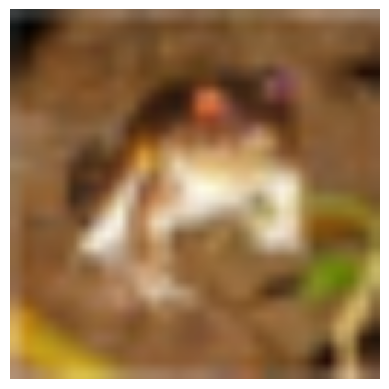

In [ ]:
# แสดงรูปภาพ Xtrain ตัวที่ 1
plt.imshow(Xtrain[0])
plt.axis('off')  # ปิดแกนตำแหน่ง (axis) บนกราฟ
plt.show()

# แสดงป้ายกำกับ (label) ของ Xtrain ตัวที่ 1
print("Label:", Ytrain[0])
# แสดงขาดและค่าของข้อมูล Xtrain ตัวที่ 1
print("sixe: ",Xtrain[0].shape)
print(Xtrain[0])

# General Network Configuration

**การกำหนด input_shape**

สำคัญมากในการสร้างโมเดลเนื่องจากมันจะช่วยให้โมเดลทราบถึงรูปแบบของข้อมูลนำเข้าและจำนวนข้อมูลและช่วยให้การสร้างชั้นและการปรับปรุงโมเดลในขั้นตอนถัดไปนำข้อมูลนี้ไปใช้งานได้อย่างถูกต้อง

ข้อมูลนำเข้าสำหรับโมเดลนี้จะเป็นรูปภาพสีขนาด 128x128 พิกเซล โดยแต่ละพิกเซลจะมีข้อมูลใน 3 ช่องสี (RGB) เพื่อระบุความสีของแต่ละพิกเซล

In [ ]:
input_shape = (128, 128, 3)

Label: [6]
sixe:  (128, 128, 3)
[[[0.23137255 0.24313726 0.24705882]
  [0.23137255 0.24313726 0.24705882]
  [0.22352941 0.23529412 0.23921569]
  ...
  [0.5803922  0.4862745  0.40392157]
  [0.5803922  0.4862745  0.40392157]
  [0.5803922  0.4862745  0.40392157]]

 [[0.23137255 0.24313726 0.24705882]
  [0.23137255 0.24313726 0.24705882]
  [0.22352941 0.23529412 0.23921569]
  ...
  [0.5803922  0.4862745  0.40392157]
  [0.5803922  0.4862745  0.40392157]
  [0.5803922  0.4862745  0.40392157]]

 [[0.21176471 0.22352941 0.22745098]
  [0.21176471 0.22352941 0.22745098]
  [0.20392157 0.21568628 0.21568628]
  ...
  [0.5686275  0.46666667 0.38039216]
  [0.5686275  0.46666667 0.38039216]
  [0.5686275  0.46666667 0.38039216]]

 ...

 [[0.69411767 0.56078434 0.44705883]
  [0.69411767 0.56078434 0.44705883]
  [0.6901961  0.5529412  0.43137255]
  ...
  [0.4745098  0.3529412  0.27058825]
  [0.4627451  0.34117648 0.2627451 ]
  [0.4627451  0.34117648 0.2627451 ]]

 [[0.69411767 0.5647059  0.45490196]
  [0.

# LeNet5

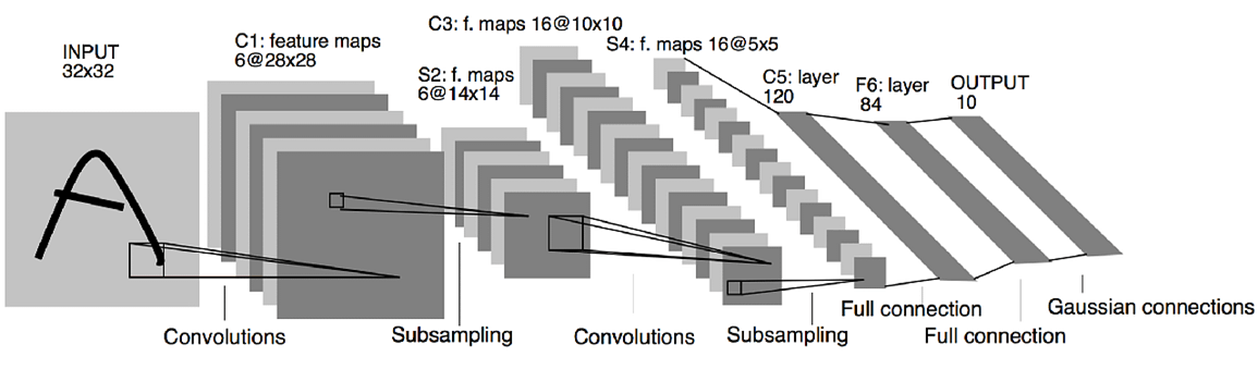

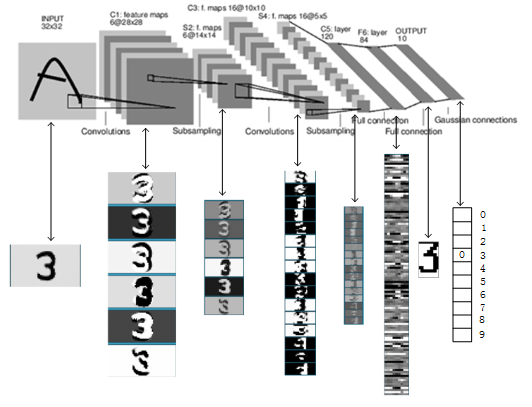

In [ ]:
#สร้างโมเดลแบบ Sequential ที่เป็นลำดับของชั้น (layers) โดยชั้นถูกเพิ่มลงในโมเดลตามลำดับ
model_lenet5 = tf.keras.Sequential()

#เพิ่มชั้น Conv2D แรกในโมเดล โดยมี 6 ตัวกรอง (filters) ขนาด 3x3 และใช้ฟังก์ชัน activation แบบ ReLU (Rectified Linear Unit) เป็นฟังก์ชันที่ใช้ในการแบ่งกลุ่มคุณลักษณะในรูปภาพ รูปภาพนำเข้าของชั้นนี้มีรูปแบบตาม input_shape ที่ถูกกำหนดไว้
model_lenet5.add(Conv2D(6, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

#เพิ่มชั้น AveragePooling2D เพื่อทำการลดขนาดของรูปภาพผ่านการหาค่าเฉลี่ยในพื้นที่ของพิกเซล ชั้นนี้จะทำให้ขนาดของรูปภาพลดลง
model_lenet5.add(AveragePooling2D())

#เพิ่มชั้น Conv2D อีกครั้ง โดยครั้งนี้มี 16 ตัวกรองขนาด 3x3 และใช้ฟังก์ชัน activation แบบ ReLU
model_lenet5.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))

#เพิ่มชั้น AveragePooling2D อีกครั้งเพื่อลดขนาดของรูปภาพอีกครั้ง
model_lenet5.add(AveragePooling2D())

#เพิ่มชั้น Flatten เพื่อแปลงข้อมูลรูปภาพให้อยู่ในรูปแบบเวกเตอร์ 1 มิติ ซึ่งจะนำเข้าในชั้น fully connected
model_lenet5.add(Flatten())

#เพิ่มชั้น fully connected ที่มี 120 โหนดและใช้ฟังก์ชัน activation แบบ ReLU
model_lenet5.add(Dense(120, activation='relu'))

#เพิ่มชั้น fully connected ที่มี 84 โหนดและใช้ฟังก์ชัน activation แบบ ReLU
model_lenet5.add(Dense(84, activation='relu'))

#เพิ่มชั้น fully connected สุดท้ายที่มี 10 โหนดและใช้ฟังก์ชัน activation แบบ softmax เพื่อทำการจัดหมวดหมู่ข้อมูล 10 หมวดหมู่
model_lenet5.add(Dense(10, activation = 'softmax'))

#ทำการคอมไพล์โมเดลโดย
#optimizer เป็น 'adam' ที่เป็นเทคนิคการคำนวณค่าความคลาดเคลื่อนระหว่างการฝึกแบบอัตโนมัติ
#loss function เป็น 'SparseCategoricalCrossentropy' ที่ใช้ในการคำนวณค่าความสูญเสียของโมเดล
#metrics วัดผล เป็น (accuracy)
model_lenet5.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

#แสดงสรุปของโมเดลที่รวมถึงจำนวนของพารามิเตอร์และโครงสร้างของแต่ละชั้น
model_lenet5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 6)       168       
                                                                 
 average_pooling2d (Average  (None, 63, 63, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 16)        880       
                                                                 
 average_pooling2d_1 (Avera  (None, 30, 30, 16)        0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 14400)             0         
                                                                 
 dense (Dense)               (None, 120)               1

train โมเดล LeNet-5 ด้วยข้อมูลการฝึกอบรม (Xtrain, Ytrain) โดยใช้การฝึกเป็นเวลา 5 epochs และ batch size คือ 32 เพื่อแบ่งข้อมูลเป็นชุดละ 32 รูปในตอนที่ปป้อนให้กับโมเดล

In [ ]:
history_lenet5 = model_lenet5.fit(Xtrain, Ytrain, epochs=5, batch_size=32, validation_data=(Xtest, Ytest), verbose=True)
#_, acc = model_lenet5.evaluate(Xtest, Ytest, verbose=0)
loss_lenet5, accuracy_lenet5 = model_lenet5.evaluate(Xtest, Ytest, verbose=0)

Epoch 1/5
469/469 [==============================] - 25s 20ms/step - loss: 1.8350 - accuracy: 0.3325 - val_loss: 1.5990 - val_accuracy: 0.4250
Epoch 2/5
469/469 [==============================] - 9s 18ms/step - loss: 1.5163 - accuracy: 0.4559 - val_loss: 1.4769 - val_accuracy: 0.4550
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 1.3423 - accuracy: 0.5195 - val_loss: 1.4320 - val_accuracy: 0.4870
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 1.1885 - accuracy: 0.5774 - val_loss: 1.3523 - val_accuracy: 0.5090
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 1.0572 - accuracy: 0.6237 - val_loss: 1.3823 - val_accuracy: 0.5160


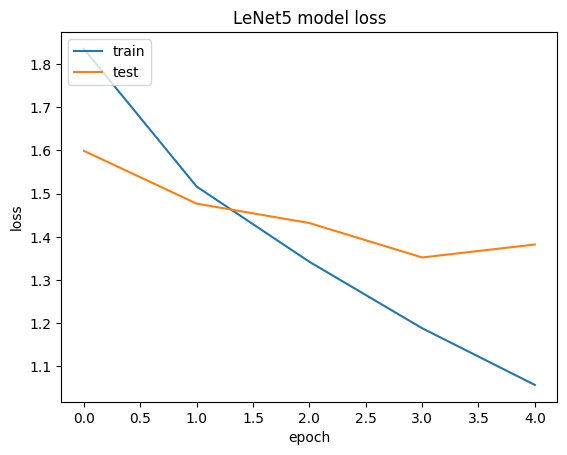

In [ ]:
plt.plot(history_lenet5.history['loss'])
plt.plot(history_lenet5.history['val_loss'])
plt.title('LeNet5 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

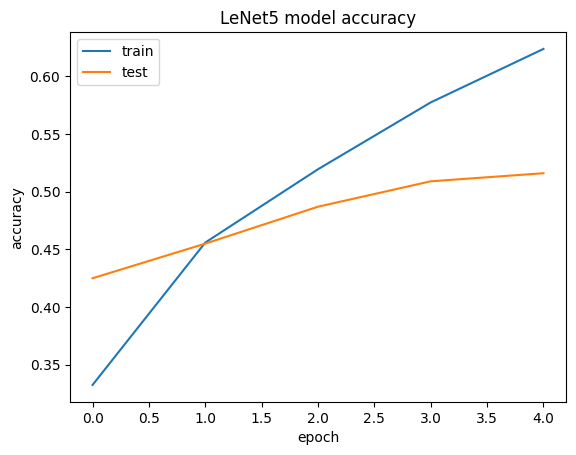

In [ ]:
plt.plot(history_lenet5.history ['accuracy'])
plt.plot(history_lenet5.history['val_accuracy'])
plt.title('LeNet5 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
print('Evaluation Loss:', loss_lenet5)
print('Evaluation Accuracy:', accuracy_lenet5)

Evaluation Loss: 1.382292628288269
Evaluation Accuracy: 0.515999972820282


# AlexNet

1. **Convolutional Layers:**

 * **Conv2D** พร้อมกับรายละเอียดต่าง ๆ เช่น filters, kernel_size, strides, activation, input_shape เป็นชั้นแรกที่ใช้ในการสกัดลักษณะที่สำคัญของภาพ ชั้นที่ใช้ในการทำคอนโวลูชัน (Convolution) บนรูปภาพ

  * **filters=96,256,384:** กำหนดให้มี 96 กรอง (filters) ในชั้นนี้ ซึ่งแต่ละกรองจะถูกใช้ในการสกัดลักษณะหนึ่ง ๆ ของรูปภาพ

  * **kernel_size=(11, 11):** กำหนดขนาดของคอนโวลูชันอย่างหนึ่งให้มีขนาด 11x11 พิกเซล

  * **strides=(4, 4):** กำหนดการเคลื่อนที่ของตัวกรองในแนวแกนแนวนอนและแนวแกนตั้ง โดยในที่นี้ตัวกรองจะขยับไปที่ตำแหน่งถัดไปทุก 4 พิกเซล

  * **activation='relu':** กำหนดฟังก์ชันการกระตุ้นในการทำคอนโวลูชันเป็น ReLU (Rectified Linear Unit) ที่มีค่าเป็นศูนย์หากน้อยกว่าศูนย์และค่าเป็นตัวเลขเดิมหากมากกว่าศูนย์

  * **padding="same":** กำหนดให้แนวรอบรูปภาพถูกเติมค่าศูนย์ (zero-padding) เพื่อให้ขนาดของเอาต์พุตเท่ากับขนาดของอินพุต นี้ช่วยให้ข้อมูลบนขอบของรูปภาพไม่สูญเสียในการทำคอนโวลูชัน

2. **Batch Normalization:**

 * **BatchNormalization**  (บาทช์ นอร์มัลไลเซชัน) ทำการปรับสมดุล (normalize) ข้อมูลในแต่ละชุดข้อมูล (batch) ที่ป้อนเข้าสู่โครงข่าย โดยการลดความหลากหลายในข้อมูล เพื่อปรับปรุงการควบคุมการกระจายของข้อมูลและส่งผลต่อการฝึกโมเดล

3. **Max Pooling Layers:**

 * **MaxPooling2D** ถูกใช้เพื่อลดขนาดของรูปภาพและลดความซับซ้อนของโมเดล ด้วยการใช้พื้นที่รวมของรูปภาพเพื่อหาค่าสูงสุด

 * **pool_size=(3,3):** กำหนดขนาดของบริเวณสำหรับ Max Pooling คือ 3x3 พิกเซล
 * **strides=(2,2):** กำหนดการเคลื่อนที่ของหน่วย Max Pooling ในแนวแกนแนวนอนและแนวแกนตั้ง คือการขยับไปยังตำแหน่งถัดไปทุก 2 พิกเซล

4. **Fully Connected Layers:**

 * หลังจากชั้น Convolutional และ Max Pooling มีชั้น Fully Connected Layers ที่ประกอบด้วย Dense Layers ที่มีหลายชั้น โดยแต่ละชั้นมีจำนวนของโหนด (units) และค่า activation ต่าง ๆ โดยชั้นสุดท้ายใช้ activation 'softmax' เพื่อใช้ในการจำแนกข้อมูลเป็นหมวดหมู่

5. **Dropout Layers:**

 * Dropout ถูกเพิ่มในชั้น Fully Connected Layers เพื่อลดการเกิด Overfitting ในระหว่างการฝึกโมเดล ค่าที่ระบุ (0.5) หมายถึงการปิดโหนดสุ่มออกจากการฝึกในอัตรา 50%

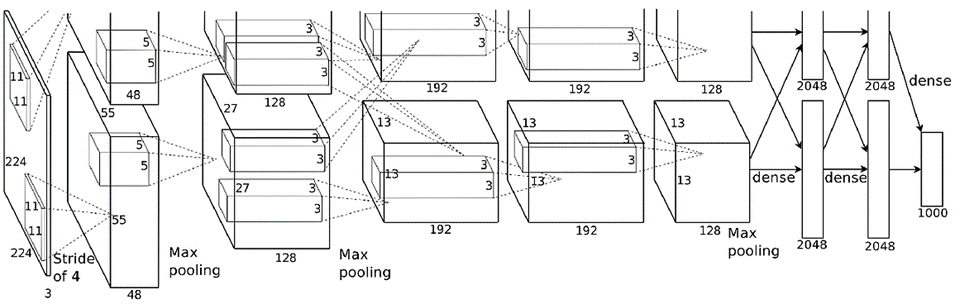

In [ ]:
#สร้างโมเดลแบบ Sequential ที่เป็นลำดับของชั้น (layers)
model_alexnet = tf.keras.Sequential()

#เพิ่มชั้น Conv2D แรกในโมเดล filters 96
model_alexnet.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=input_shape))

#เพิ่มชั้น Batch Normalization เพื่อการปรับสมดุล (normalize) ข้อมูลในแต่ละชุดข้อมูล (batch)
model_alexnet.add(BatchNormalization())

#เพิ่มชั้น Max Pooling ในโมเดลเพื่อลดขนาดของรูปภาพ
model_alexnet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

#เพิ่มชั้น Conv2D อีกครั้ง filters 256
model_alexnet.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))

#เพิ่มชั้น Batch Normalization เพื่อการปรับสมดุล (normalize) ข้อมูลในแต่ละชุดข้อมูล (batch) อีกครั้ง
model_alexnet.add(BatchNormalization())

#เพิ่มชั้น Max Pooling เพื่อลดขนาดของรูปภาพ อีกครั้ง
model_alexnet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

#เพิ่มชั้น Conv2D อีกครั้ง filters 384
model_alexnet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))

#เพิ่มชั้น Batch Normalization เพื่อการปรับสมดุล (normalize) ข้อมูลในแต่ละชุดข้อมูล (batch) อีกครั้ง
model_alexnet.add(BatchNormalization())

#เพิ่มชั้น Conv2D อีกครั้ง filters 384
model_alexnet.add(Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"))

#เพิ่มชั้น Batch Normalization เพื่อการปรับสมดุล (normalize) ข้อมูลในแต่ละชุดข้อมูล (batch) อีกครั้ง
model_alexnet.add(BatchNormalization())

#เพิ่มชั้น Conv2D อีกครั้ง filters 256
model_alexnet.add(Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"))

#เพิ่มชั้น Batch Normalization เพื่อการปรับสมดุล (normalize) ข้อมูลในแต่ละชุดข้อมูล (batch) อีกครั้ง
model_alexnet.add(BatchNormalization())

#เพิ่มชั้น Max Pooling เพื่อลดขนาดของรูปภาพ อีกครั้ง
model_alexnet.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

#เพิ่มชั้น Flatten เพื่อแปลงข้อมูลรูปภาพให้อยู่ในรูปแบบเวกเตอร์ 1 มิติ ซึ่งจะนำเข้าในชั้น fully connected
model_alexnet.add(Flatten())

#เพิ่มชั้น fully connected ที่มี 4096 โหนดและใช้ฟังก์ชัน activation แบบ ReLU
model_alexnet.add(Dense(4096, activation='relu'))

#เพิ่มชั้น Dropout ปิดโหนดสุ่มออกจากการฝึกในอัตรา 50%
model_alexnet.add(Dropout(0.5))

#เพิ่มชั้น fully connected ที่มี 4096 โหนดและใช้ฟังก์ชัน activation แบบ ReLU
model_alexnet.add(Dense(4096, activation='relu'))

#เพิ่มชั้น Dropout ปิดโหนดสุ่มออกจากการฝึกในอัตรา 50%
model_alexnet.add(Dropout(0.5))

#เพิ่มชั้น fully connected ที่มี 10 โหนดและใช้ฟังก์ชัน activation แบบ ReLU
model_alexnet.add(Dense(10, activation= 'softmax'))

#ทำการคอมไพล์โมเดลโดย
#optimizer เป็น 'adam' ที่เป็นเทคนิคการคำนวณค่าความคลาดเคลื่อนระหว่างการฝึกแบบอัตโนมัติ
#loss function เป็น 'SparseCategoricalCrossentropy' ที่ใช้ในการคำนวณค่าความสูญเสียของโมเดล
#metrics วัดผล เป็น (accuracy)
model_alexnet.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

#แสดงสรุปของโมเดลที่รวมถึงจำนวนของพารามิเตอร์และโครงสร้างของแต่ละชั้น
model_alexnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 96)        34944     
                                                                 
 batch_normalization (Batch  (None, 30, 30, 96)        384       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 256)       614656    
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 256)       1024      
 chNormalization)                                                
                                                        

train โมเดล AlexNet ด้วยข้อมูลการฝึกอบรม (Xtrain, Ytrain) โดยใช้การฝึกเป็นเวลา 5 epochs และ batch size คือ 32 เพื่อแบ่งข้อมูลเป็นชุดละ 32 รูปในตอนที่ป้อนให้กับโมเดล

In [ ]:
history_alexnet = model_alexnet.fit(Xtrain, Ytrain, epochs=5, batch_size=32, validation_data=(Xtest, Ytest), verbose=True)
loss_alexnet, accuracy_alexnet = model_alexnet.evaluate(Xtest, Ytest, verbose=0)

Epoch 1/5
469/469 [==============================] - 33s 23ms/step - loss: 2.0913 - accuracy: 0.3084 - val_loss: 2.2921 - val_accuracy: 0.2530
Epoch 2/5
469/469 [==============================] - 9s 20ms/step - loss: 1.6413 - accuracy: 0.4110 - val_loss: 2.0855 - val_accuracy: 0.3260
Epoch 3/5
469/469 [==============================] - 9s 20ms/step - loss: 1.4808 - accuracy: 0.4697 - val_loss: 1.6329 - val_accuracy: 0.4110
Epoch 4/5
469/469 [==============================] - 11s 23ms/step - loss: 1.3330 - accuracy: 0.5279 - val_loss: 1.4238 - val_accuracy: 0.4940
Epoch 5/5
469/469 [==============================] - 11s 22ms/step - loss: 1.2219 - accuracy: 0.5678 - val_loss: 1.2384 - val_accuracy: 0.5540


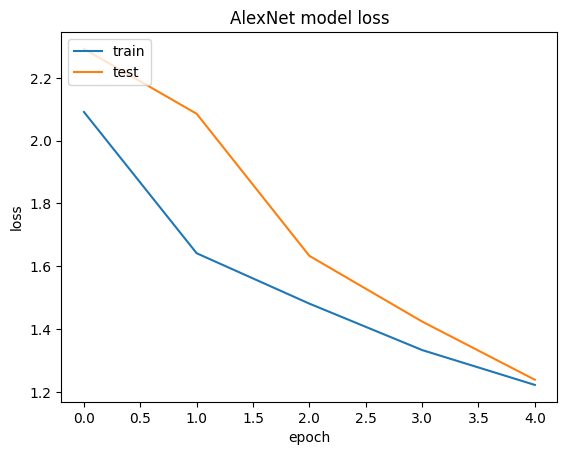

In [ ]:
plt.plot(history_alexnet.history['loss'])
plt.plot(history_alexnet.history['val_loss'])
plt.title('AlexNet model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

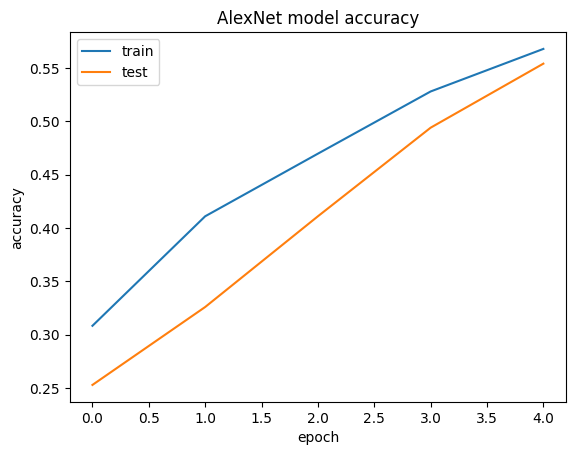

In [ ]:
plt.plot(history_alexnet.history ['accuracy'])
plt.plot(history_alexnet.history['val_accuracy'])
plt.title('AlexNet model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
print('Evaluation Loss:', loss_alexnet)
print('Evaluation Accuracy:', accuracy_alexnet)

Evaluation Loss: 1.2383546829223633
Evaluation Accuracy: 0.5540000200271606


# **Transfer learning**

การทำ **transfer learning**

คือ การถ่ายทอดความรู้จาก model ที่ train มาแล้วเรียบร้อย (ส่วนมากจะ train มาจาก dataset ใหญ่ๆเช่น ImageNet) จาก task หนึ่ง (เช่น classify image ในโดเมน A) มาให้อีก model หนึ่ง เพื่อทำอีก task หนึ่ง (เช่น classify image ในโดเมน B)โดยการนำ weight ของ model ที่ train มาแล้วมาใช้ initialize ค่า weight ของ model ที่เราจะ train ใหม่

รูปแสดงตัวอย่าง Transfer learning from ImageNet




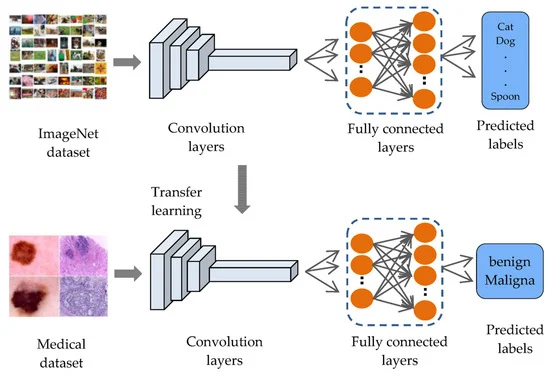

**ทำไมต้องทำ transfer learning**

* ดีกว่า random initialise ค่า weight หรือ เรียนรู้จาก 0 -> ประหยัดเวลาในการเทรนให้ model converge
* สามารถเรียนรู้จากข้อมูลปริมาณไม่มากได้ เมื่อเทียบกับการเรียนรู้จาก 0 (แล้วแต่ความแตกต่างกันระหว่าง domain ของข้อมูลที่ train มา และ domain ที่ต้องการเรียนรู้)


**"transfer learning"** เป็นการใช้โมเดลที่ถูกเทรนไว้ล่วงหน้า (pre-trained model) จากงานหนึ่งมาใช้ในงานอื่น ๆ โดยการถ่ายโอนความรู้ที่โมเดลได้เรียนรู้จากงานแรกมาใช้ในงานที่สอง
เราสามารถใช้ส่วนหนึ่งหรือทั้งโมเดลที่ถูกเทรนไว้ล่วงหน้าเพื่อประหยัดเวลาและทรัพยากรในการฝึกโมเดลใหม่

**"pre-trained weights"** เป็นส่วนหนึ่งของ transfer learning  เป็นน้ำหนัก (weights) ที่ถูกเทรนไว้ล่วงหน้าบนโมเดล โดยพวกนี้สามารถนำมาใช้ในโมเดลใหม่โดยไม่จำเป็นต้องโหลดโมเดลใหม่ทั้งหมด

# VGGNet

 **VGG16 (Visual Geometry Group 16)**

 โมเดลนี้เราจะใช้ Pre-trained weights จาก ImageNet

  **Pre-trained weights (น้ำหนักที่ถูกเทรนไว้ล่วงหน้า)**
 คือน้ำหนักที่ถูกคำนวณและปรับให้เหมาะสมกับโมเดลแล้วจากการฝึกก่อนหน้านี้ โดยใช้ชุดข้อมูลที่ใหญ่และมีความหลากหลายมาก เช่น ImageNet. น้ำหนักเหล่านี้ถูกบันทึกไว้หลังจากการฝึกและสามารถนำมาใช้ในโมเดลอื่น ๆ ที่มีโครงสร้างคล้ายกันหรือในงานที่คล้ายกันได้ โดยที่ไม่ต้องฝึกใหม่จากข้อมูลศูนย์

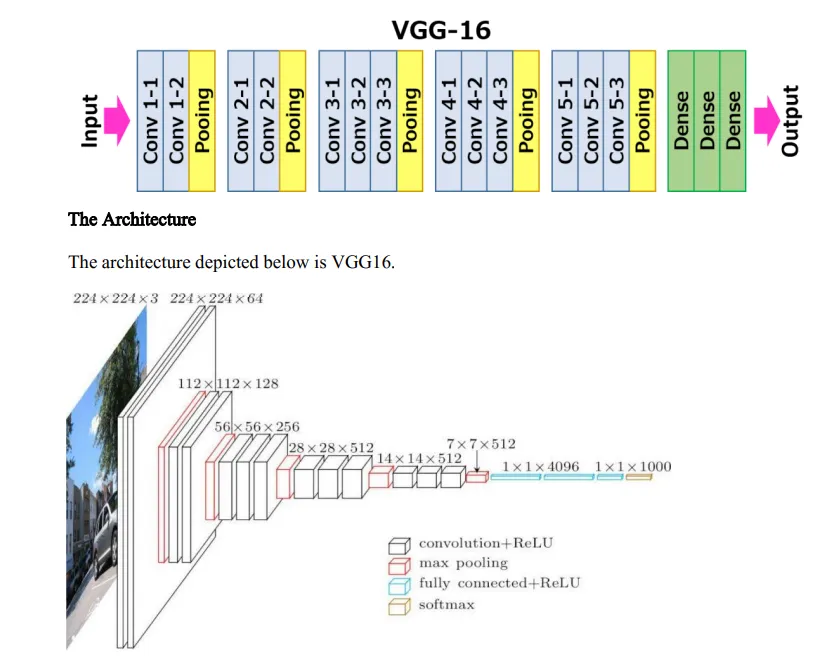

In [ ]:
# สร้างฟังก์ชันสำหรับสร้าง VGG Block
def vgg_block(num_conv_layers, num_filters, block_num):
    layers = []
    for _ in range(num_conv_layers):
        layers.append(Conv2D(num_filters, (3, 3), padding='same', activation='relu'))
    layers.append(MaxPooling2D((2, 2), strides=(2, 2), name=f'block{block_num}_pool'))
    return tf.keras.Sequential(layers)

# สร้างโมเดล VGGNet
def create_vgg_model():
    input_layer = Input(shape=input_shape, name='input_layer')
    x = vgg_block(2, 64, 1)(input_layer)
    x = vgg_block(2, 128, 2)(x)
    x = vgg_block(3, 256, 3)(x)
    x = vgg_block(3, 512, 4)(x)
    x = vgg_block(3, 512, 5)(x)
    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dense(4096, activation='relu')(x)
    output_layer = Dense(10, activation='softmax', name='output_layer')(x)

    model = Model(inputs=input_layer, outputs=output_layer, name='vgg_model')
    return model

# สร้างโมเดล VGGNet
model_vgg = create_vgg_model()

#ทำการคอมไพล์โมเดลโดย
#optimizer เป็น 'adam' ที่เป็นเทคนิคการคำนวณค่าความคลาดเคลื่อนระหว่างการฝึกแบบอัตโนมัติ
#loss function เป็น 'SparseCategoricalCrossentropy' ที่ใช้ในการคำนวณค่าความสูญเสียของโมเดล
#metrics วัดผล เป็น (accuracy)
model_vgg.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

#แสดงสรุปของโมเดลที่รวมถึงจำนวนของพารามิเตอร์และโครงสร้างของแต่ละชั้น
model_vgg.summary()

Model: "vgg_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 128, 128, 3)]     0         
                                                                 
 sequential_5 (Sequential)   (None, 64, 64, 64)        38720     
                                                                 
 sequential_6 (Sequential)   (None, 32, 32, 128)       221440    
                                                                 
 sequential_7 (Sequential)   (None, 16, 16, 256)       1475328   
                                                                 
 sequential_8 (Sequential)   (None, 8, 8, 512)         5899776   
                                                                 
 sequential_9 (Sequential)   (None, 4, 4, 512)         7079424   
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0 

train โมเดล VGGNet ด้วยข้อมูลการฝึกอบรม (Xtrain, Ytrain) โดยใช้การฝึกเป็นเวลา 5 epochs และ batch size คือ 32 เพื่อแบ่งข้อมูลเป็นชุดละ 32 รูปในตอนที่ป้อนให้กับโมเดล

In [ ]:
history_vgg = model_vgg.fit(Xtrain, Ytrain, epochs=5, batch_size=32, validation_data=(Xtest, Ytest), verbose=True)
loss_vgg, accuracy_vgg = model_vgg.evaluate(Xtest, Ytest, verbose=0)

Epoch 1/5
469/469 [==============================] - 91s 151ms/step - loss: 2.3061 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.1020
Epoch 2/5
469/469 [==============================] - 67s 142ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3023 - val_accuracy: 0.1000
Epoch 3/5
469/469 [==============================] - 66s 140ms/step - loss: 2.3026 - accuracy: 0.1003 - val_loss: 2.3020 - val_accuracy: 0.1000
Epoch 4/5
469/469 [==============================] - 66s 140ms/step - loss: 2.3025 - accuracy: 0.1000 - val_loss: 2.3020 - val_accuracy: 0.1000
Epoch 5/5
469/469 [==============================] - 66s 141ms/step - loss: 2.3026 - accuracy: 0.0979 - val_loss: 2.3019 - val_accuracy: 0.1000


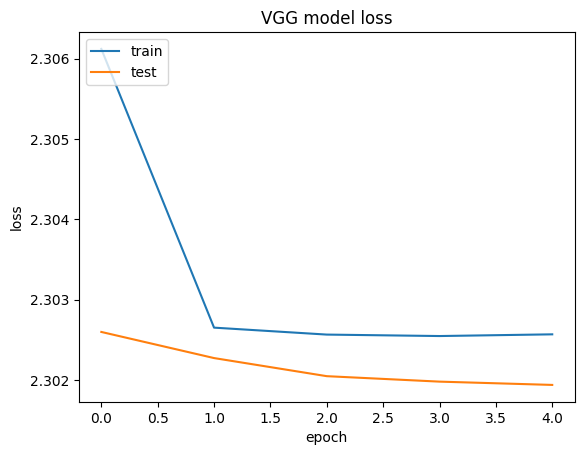

In [ ]:
plt.plot(history_vgg.history['loss'])
plt.plot(history_vgg.history['val_loss'])
plt.title('VGG model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

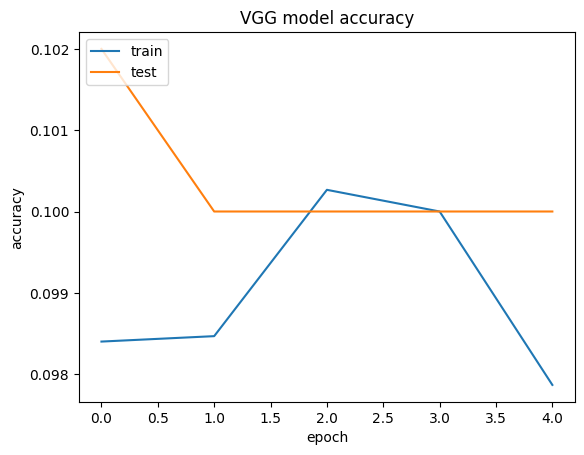

In [ ]:
plt.plot(history_vgg.history['accuracy'])
plt.plot(history_vgg.history['val_accuracy'])
plt.title('VGG model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
print('Evaluation Loss:', loss_vgg)
print('Evaluation Accuracy:', accuracy_vgg)

Evaluation Loss: 2.3019368648529053
Evaluation Accuracy: 0.10000000149011612


#**VGG16**

**VGG16**

โหลดโมเดล VGG16 จาก TensorFlow Hub

โหลดน้ำหนักที่ถูกเทรนไว้ล่วงหน้าด้วยชุดข้อมูล ImageNet

In [ ]:
#โหลดโมเดล VGG16 จาก TensorFlow Hub
#weights='imagenet': โหลดน้ำหนักที่ถูกเทรนไว้ล่วงหน้าด้วยชุดข้อมูล ImageNet
#include_top=False: ไม่รวมชั้น Fully Connected Layer (Dense Layer) ด้านบนของโมเดล VGG16 เนื่องจากจะสร้างชั้น Fully Connected Layer เอง
vgg16 = tf.keras.applications.VGG16(weights='imagenet',include_top=False,input_shape=input_shape)

#เข้าถึง output (ผลลัพธ์) ของชั้นสุดท้ายของโมเดล VGG16 ที่ถูกโหลดมาจาก pre-trained weights
x = vgg16.layers[-1].output

#เพิ่มชั้น Global Average Pooling ซึ่งทำหน้าที่ลดขนาดของข้อมูลอินพุตลงจากมิติสูงมาเป็นมิติเดียว และช่วยลดความซับซ้อนของโมเดล ที่จะทำให้การฝึกโมเดลเร็วขึ้นและลดความเสี่ยงในการเกิด Overfitting
x = tf.keras.layers.GlobalAveragePooling2D()(x)

#เพิ่มชั้น Dropout ด้วยอัตราการปิดโหนดที่ 25% เพื่อลดความเสี่ยงในการเกิด Overfitting
x = tf.keras.layers.Dropout(0.25)(x)

#เพิ่มชั้น Dense (Fully Connected) ที่มี 1024 โหนดและใช้ฟังก์ชัน activation แบบ ReLU
x = tf.keras.layers.Dense(1024,activation='relu')(x)

#เพิ่มชั้น Dropout ด้วยอัตราการปิดโหนดที่ 25% เพื่อลดความเสี่ยงในการเกิด Overfitting อีกครั้ง
x = tf.keras.layers.Dropout(0.25)(x)

#เพิ่มชั้น Dense (Fully Connected) ที่มี 10 โหนดและใช้ฟังก์ชัน activation แบบ softmax
x =  tf.keras.layers.Dense(10,activation='softmax')(x)

#สร้างโมเดล VGG16 ใหม่โดยกำหนดโมเดลที่คุณสร้างขึ้นด้านบนของโมเดล VGG16 และกำหนดข้อมูลอินพุตใหม่
model_vgg16 = tf.keras.Model(vgg16.input,x)

#ทำการคอมไพล์โมเดลโดย
#optimizer เป็น 'adam' ที่เป็นเทคนิคการคำนวณค่าความคลาดเคลื่อนระหว่างการฝึกแบบอัตโนมัติ
#loss function เป็น 'SparseCategoricalCrossentropy' ที่ใช้ในการคำนวณค่าความสูญเสียของโมเดล
#metrics วัดผล เป็น (accuracy)
model_vgg16.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

#แสดงสรุปของโมเดลที่รวมถึงจำนวนของพารามิเตอร์และโครงสร้างของแต่ละชั้น
model_vgg16.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                              

train โมเดล VGG16 ด้วยข้อมูลการฝึกอบรม (Xtrain, Ytrain) โดยใช้การฝึกเป็นเวลา 5 epochs และ batch size คือ 32 เพื่อแบ่งข้อมูลเป็นชุดละ 32 รูปในตอนที่ป้อนให้กับโมเดล

In [ ]:
history_vgg16 = model_vgg16.fit(Xtrain, Ytrain, epochs=5, batch_size=32, validation_data=(Xtest, Ytest), verbose=True)
loss_vgg16, accuracy_vgg16 = model_vgg16.evaluate(Xtest, Ytest, verbose=0)

Epoch 1/5
469/469 [==============================] - 95s 151ms/step - loss: 2.1806 - accuracy: 0.1699 - val_loss: 1.9353 - val_accuracy: 0.2580
Epoch 2/5
469/469 [==============================] - 68s 145ms/step - loss: 1.9145 - accuracy: 0.2640 - val_loss: 1.8104 - val_accuracy: 0.3020
Epoch 3/5
469/469 [==============================] - 69s 147ms/step - loss: 1.7930 - accuracy: 0.3151 - val_loss: 1.8043 - val_accuracy: 0.3310
Epoch 4/5
469/469 [==============================] - 69s 147ms/step - loss: 1.7031 - accuracy: 0.3557 - val_loss: 1.6730 - val_accuracy: 0.3810
Epoch 5/5
469/469 [==============================] - 69s 147ms/step - loss: 1.6279 - accuracy: 0.3931 - val_loss: 1.5263 - val_accuracy: 0.4380


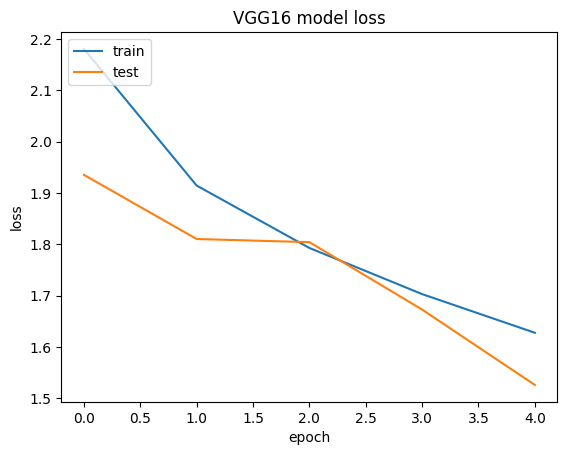

In [ ]:
plt.plot(history_vgg16.history['loss'])
plt.plot(history_vgg16.history['val_loss'])
plt.title('VGG16 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

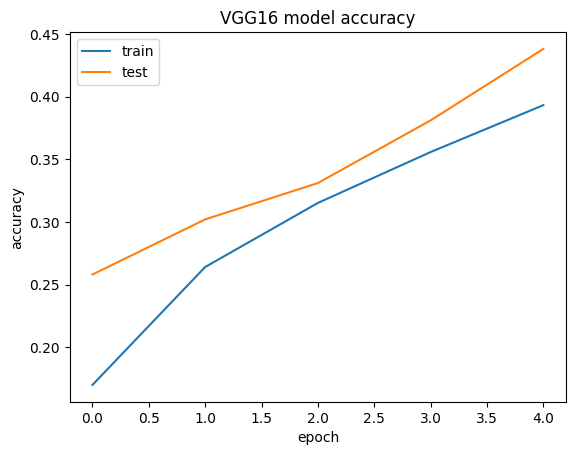

In [ ]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('VGG16 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
print('Evaluation Loss:', loss_vgg16)
print('Evaluation Accuracy:', accuracy_vgg16)

Evaluation Loss: 1.5263038873672485
Evaluation Accuracy: 0.43799999356269836


# GoogLeNet / Inception

**GoogLeNet (Inception):**

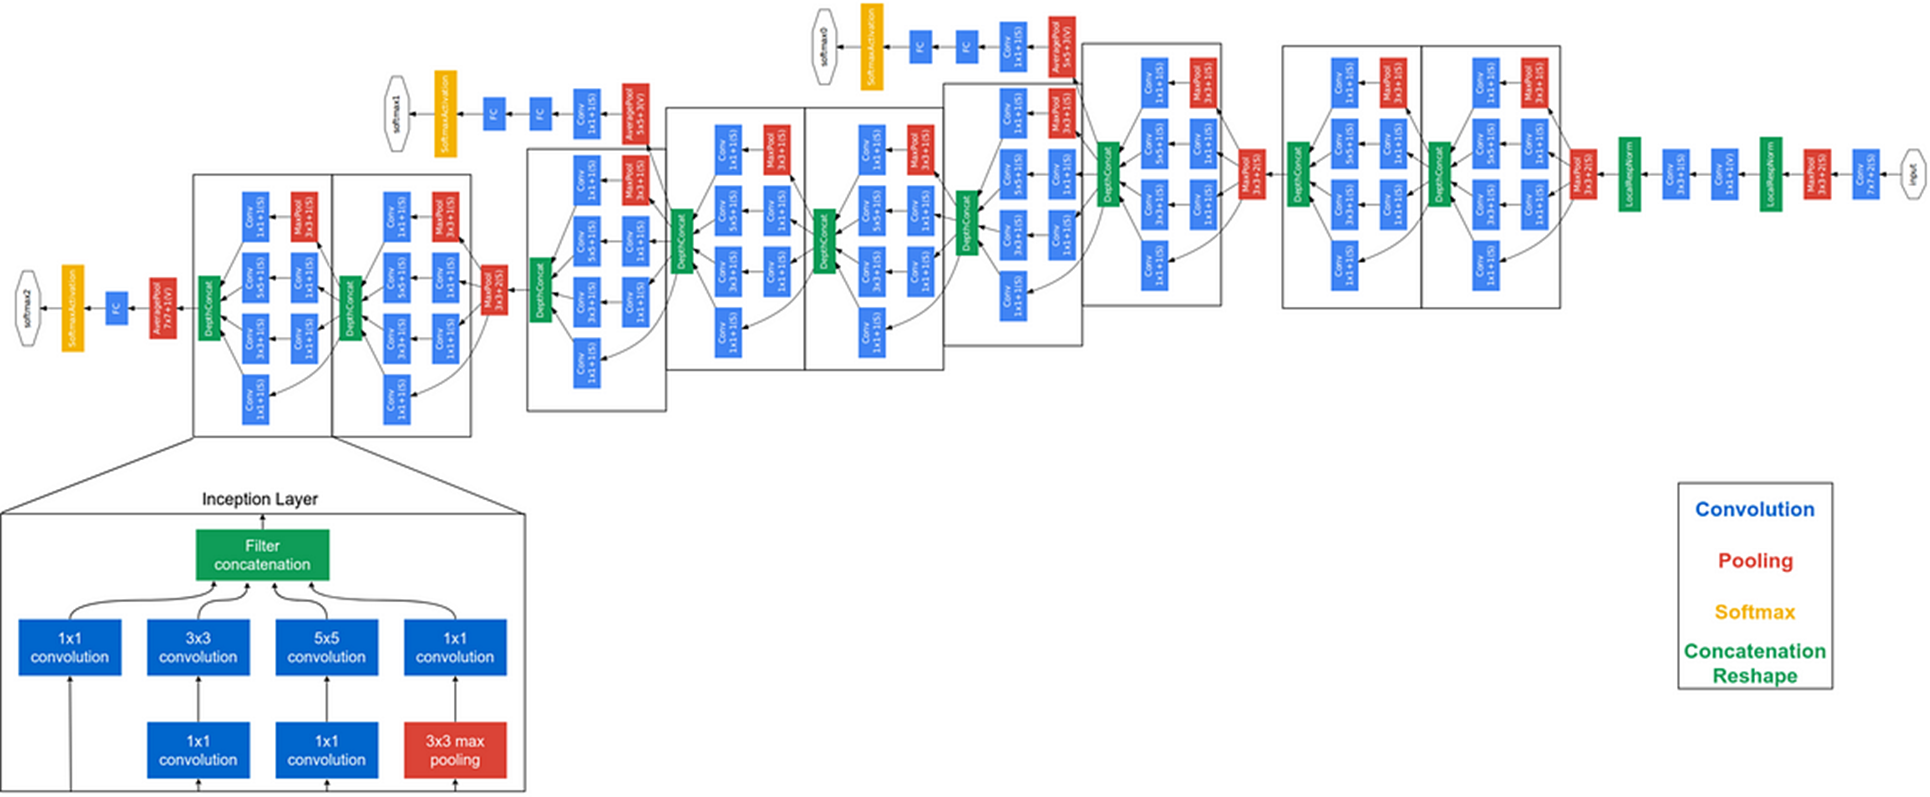

* ชื่อเต็ม: Inception-v1 (GoogLeNet)
* พัฒนาโดยทีมวิจัยของ Google (ความช่วยเหลือจากบุคคลอื่น ๆ ด้วย)
* โมเดล Inception คือชื่อของโครงสร้างของ GoogLeNet
* โดดเด่นด้วย Inception module ที่ใช้หลายสายการคำนวณแบบพร้อมกัน โดยสามารถปรับความลึกของโมเดลได้อย่างหลากหลาย ซึ่งช่วยลดปัญหา vanishing gradient และ overfitting
* ใช้ Global Average Pooling แทน Fully Connected Layer สุดท้าย
* มีการใช้ Batch Normalization ในโมเดล
* ใช้สถาปัตยกรรมของ Convolution และ Max Pooling ที่ซับซ้อน

**InceptionV3:**
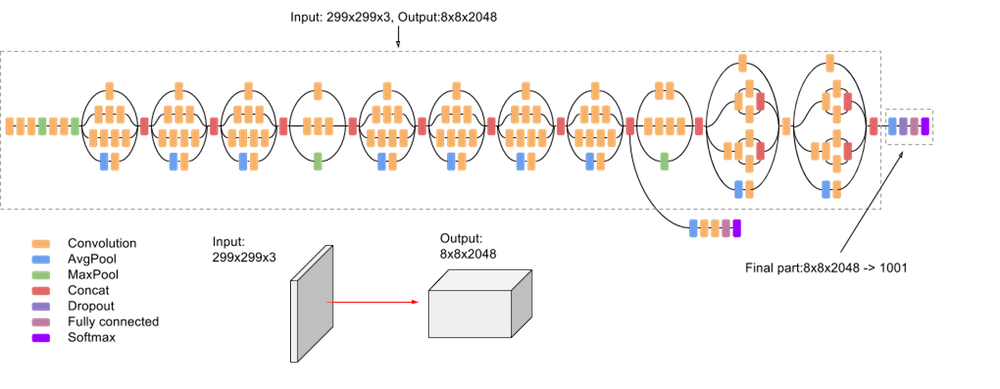
* ชื่อเต็ม: Inception-v3
* พัฒนาโดยทีมวิจัยของ Google
* เป็นการพัฒนาต่อยอดจาก Inception-v1 (GoogLeNet) โดยเพิ่มความลึกและปรับปรุงโครงสร้าง
* ใช้ Inception module ในการทำความลึกของโมเดลและลดจำนวนพารามิเตอร์
* มีการใช้สถาปัตยกรรมของ Convolution และ Average Pooling ที่ซับซ้อน
* ใช้ Batch Normalization และ Auxiliary Classifiers ในโมเดล


**InceptionV3 เป็นการพัฒนาต่อยอดจาก GoogLeNet โดยเพิ่มความลึกและปรับปรุงโครงสร้างเพื่อประสิทธิภาพที่ดีขึ้น
มีความซับซ้อนมากขึ้นและมีประสิทธิภาพในการจำแนกหมวดหมู่รูปภาพที่ดีกว่า Inception-v1 (GoogLeNet)
ทั้งสองโมเดลมีประสิทธิภาพในการจำแนกหมวดหมู่รูปภาพที่ดี และการเลือกใช้โมเดลขึ้นอยู่กับงานและข้อกำหนดของโปรเจกต์ที่กำลังทำ**

In [ ]:
num_classes = 10

# สร้างฟังก์ชันสำหรับ Inception block
def inception_block(x, filters):
    conv1x1 = Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)

    conv3x3 = Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    conv3x3 = Conv2D(filters[2], (3, 3), padding='same', activation='relu')(conv3x3)

    conv5x5 = Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    conv5x5 = Conv2D(filters[4], (5, 5), padding='same', activation='relu')(conv5x5)

    maxpool = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    maxpool_conv = Conv2D(filters[5], (1, 1), padding='same', activation='relu')(maxpool)

    inception_output = Concatenate( axis=-1)([conv1x1, conv3x3, conv5x5, maxpool_conv])
    return inception_output

# สร้างโมเดล GoogLeNet
def googlenet(input_shape, num_classes):
    input_layer = Input(shape=input_shape)

    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(input_layer)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = Conv2D(64, (1, 1), padding='same', activation='relu')(x)
    x = Conv2D(192, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = inception_block(x, [64, 96, 128, 16, 32, 32])
    x = inception_block(x, [128, 128, 192, 32, 96, 64])
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = inception_block(x, [192, 96, 208, 16, 48, 64])
    x = inception_block(x, [160, 112, 224, 24, 64, 64])
    x = inception_block(x, [128, 128, 256, 24, 64, 64])
    x = inception_block(x, [112, 144, 288, 32, 64, 64])
    x = inception_block(x, [256, 160, 320, 32, 128, 128])
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = inception_block(x, [256, 160, 320, 32, 128, 128])
    x = inception_block(x, [384, 192, 384, 48, 128, 128])

    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.4)(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(input_layer, x, name='googlenet')
    return model

# สร้างโมเดล GoogLeNet
model_GoogLeNet = googlenet(input_shape, num_classes)

# คอมไพล์โมเดล
model_GoogLeNet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# แสดงสรุปของโมเดล
model_GoogLeNet.summary()


Model: "googlenet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_18 (Conv2D)          (None, 64, 64, 64)           9472      ['input_3[0][0]']             
                                                                                                  
 max_pooling2d_6 (MaxPoolin  (None, 32, 32, 64)           0         ['conv2d_18[0][0]']           
 g2D)                                                                                             
                                                                                                  
 conv2d_19 (Conv2D)          (None, 32, 32, 64)           4160      ['max_pooling2d_6[0][0

train โมเดล GoogLeNet ด้วยข้อมูลการฝึกอบรม (Xtrain, Ytrain) โดยใช้การฝึกเป็นเวลา 5 epochs และ batch size คือ 32 เพื่อแบ่งข้อมูลเป็นชุดละ 32 รูปในตอนที่ปป้อนให้กับโมเดล



In [ ]:
history_GoogLeNet = model_GoogLeNet.fit(Xtrain, Ytrain, epochs=5, batch_size=32, validation_data=(Xtest, Ytest), verbose=True)
loss_GoogLeNet, accuracy_GoogLeNet  = model_GoogLeNet.evaluate(Xtest, Ytest, verbose=0)

Epoch 1/5
469/469 [==============================] - 58s 54ms/step - loss: 2.3038 - accuracy: 0.1005 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 2/5
469/469 [==============================] - 25s 53ms/step - loss: 2.3033 - accuracy: 0.1007 - val_loss: 2.3021 - val_accuracy: 0.1120
Epoch 3/5
469/469 [==============================] - 20s 43ms/step - loss: 2.3029 - accuracy: 0.0982 - val_loss: 2.3021 - val_accuracy: 0.1000
Epoch 4/5
469/469 [==============================] - 20s 43ms/step - loss: 2.3026 - accuracy: 0.1002 - val_loss: 2.3021 - val_accuracy: 0.1000
Epoch 5/5
469/469 [==============================] - 20s 43ms/step - loss: 2.3027 - accuracy: 0.1015 - val_loss: 2.3019 - val_accuracy: 0.1120


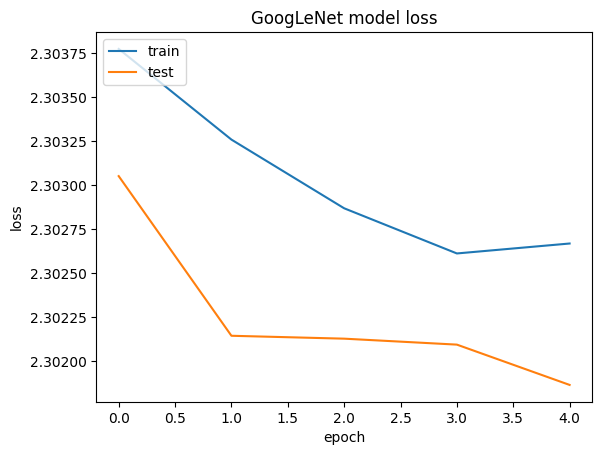

In [ ]:
plt.plot(history_GoogLeNet.history['loss'])
plt.plot(history_GoogLeNet.history['val_loss'])
plt.title('GoogLeNet model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

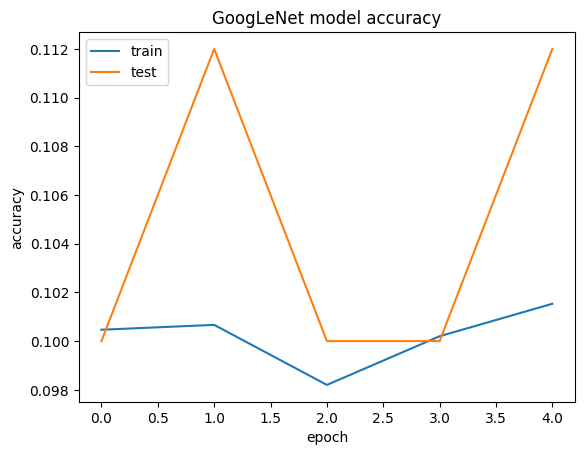

In [ ]:
plt.plot(history_GoogLeNet.history['accuracy'])
plt.plot(history_GoogLeNet.history['val_accuracy'])
plt.title('GoogLeNet model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
print('Evaluation Loss:', loss_GoogLeNet)
print('Evaluation Accuracy:', accuracy_GoogLeNet)

Evaluation Loss: 2.301863431930542
Evaluation Accuracy: 0.1120000034570694


#Inception-v3

In [ ]:
# โหลดโมเดล InceptionV3 ที่ถูกเทรนไว้ล่วงหน้าด้วยชุดข้อมูล ImageNet จาก TensorFlow Keras
# weights='imagenet': ใช้น้ำหนัก (weights) ที่ถูกเทรนไว้ล่วงหน้าบนโมเดล InceptionV3 เพื่อให้โมเดลมีความรู้เรื่องวัตถุในรูปภาพจาก ImageNet
# ไม่รวมชั้น Fully Connected Layer ที่อยู่บนส่วนสุดท้ายของโมเดล (ส่วนที่ใช้ในการจำแนกหมวดหมู่) เพื่อให้เราสร้างชั้นใหม่สำหรับงานของเรา
incepV3 = tf.keras.applications.InceptionV3(weights='imagenet',include_top=False,input_shape=input_shape)

#เข้าถึง output (ผลลัพธ์) ของชั้นสุดท้ายของโมเดล InceptionV3 ที่ถูกโหลดมาในตัวแปร incepV3 และเก็บเป็นตัวแปร x
x = incepV3.layers[-1].output

#เพิ่มชั้น Global Average Pooling บน tensor x ซึ่งเป็น output ของโมเดล InceptionV3 ที่ถูกเข้าถึงในขั้นตอนก่อนหน้า
#Global Average Pooling ทำให้เราได้เวกเตอร์ feature ที่เป็นเสมือนภาพที่ถูกสกัดลักษณะที่สำคัญออกมาจากภาพ โดยหาค่าเฉลี่ยในแต่ละช่อง (channel) ของ tensor
x = tf.keras.layers.GlobalAveragePooling2D()(x)

#เพิ่มชั้น Dropout ด้วยอัตราการปิดโหนดที่ 25% เพื่อลดความเสี่ยงในการเกิด Overfitting
x = tf.keras.layers.Dropout(0.25)(x)

#เพิ่มชั้น Dense (Fully Connected) ที่มี 1024 โหนดและใช้ฟังก์ชัน activation แบบ ReLU
x = tf.keras.layers.Dense(1024,activation='relu')(x)

#เพิ่มชั้น Dropout ด้วยอัตราการปิดโหนดที่ 25% เพื่อลดความเสี่ยงในการเกิด Overfitting
x = tf.keras.layers.Dropout(0.25)(x)

#เพิ่มชั้น Dense (Fully Connected) ที่มี 10 โหนดและใช้ฟังก์ชัน activation แบบ softmax
x =  tf.keras.layers.Dense(10,activation='softmax')(x)

#สร้างโมเดลใหม่ที่ใช้ input layer และ output layer ของ InceptionV3 โดยกำหนดโมเดลที่คุณสร้างขึ้นด้านบนของโมเดล InceptionV3 และกำหนดข้อมูลอินพุตใหม่
model_incepV3 = tf.keras.Model(incepV3.input,x)

#ทำการคอมไพล์โมเดลโดย
#optimizer เป็น 'adam' ที่เป็นเทคนิคการคำนวณค่าความคลาดเคลื่อนระหว่างการฝึกแบบอัตโนมัติ
#loss function เป็น 'SparseCategoricalCrossentropy' ที่ใช้ในการคำนวณค่าความสูญเสียของโมเดล
#metrics วัดผล เป็น (accuracy)
model_incepV3.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

#แสดงสรุปของโมเดลที่รวมถึงจำนวนของพารามิเตอร์และโครงสร้างของแต่ละชั้น
model_incepV3.summary()

87910968/87910968 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 63, 63, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 63, 63, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     

train โมเดล GoogLeNet ด้วยข้อมูลการฝึกอบรม (Xtrain, Ytrain) โดยใช้การฝึกเป็นเวลา 10 epochs และ batch size คือ 64 เพื่อแบ่งข้อมูลเป็นชุดละ 64 รูปในตอนที่ปป้อนให้กับโมเดล

In [ ]:
history_incepV3 = model_incepV3.fit(Xtrain, Ytrain, epochs=5, batch_size=32, validation_data=(Xtest, Ytest), verbose=True)
loss_incepV3, accuracy_incepV3  = model_incepV3.evaluate(Xtest, Ytest, verbose=0)

Epoch 1/5
469/469 [==============================] - 150s 136ms/step - loss: 1.3590 - accuracy: 0.5643 - val_loss: 1.1959 - val_accuracy: 0.6260
Epoch 2/5
469/469 [==============================] - 42s 90ms/step - loss: 0.8189 - accuracy: 0.7379 - val_loss: 1.1891 - val_accuracy: 0.6770
Epoch 3/5
469/469 [==============================] - 42s 89ms/step - loss: 0.6223 - accuracy: 0.7934 - val_loss: 0.8416 - val_accuracy: 0.7260
Epoch 4/5
469/469 [==============================] - 43s 91ms/step - loss: 0.5233 - accuracy: 0.8311 - val_loss: 0.8379 - val_accuracy: 0.7440
Epoch 5/5
469/469 [==============================] - 43s 91ms/step - loss: 0.4310 - accuracy: 0.8595 - val_loss: 0.7517 - val_accuracy: 0.7650


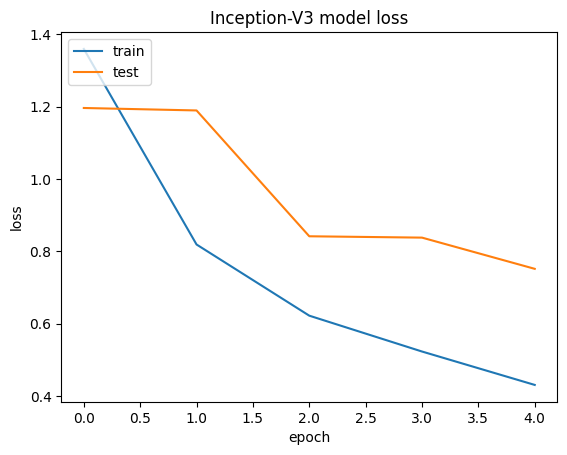

In [ ]:
plt.plot(history_incepV3.history['loss'])
plt.plot(history_incepV3.history['val_loss'])
plt.title('Inception-V3 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

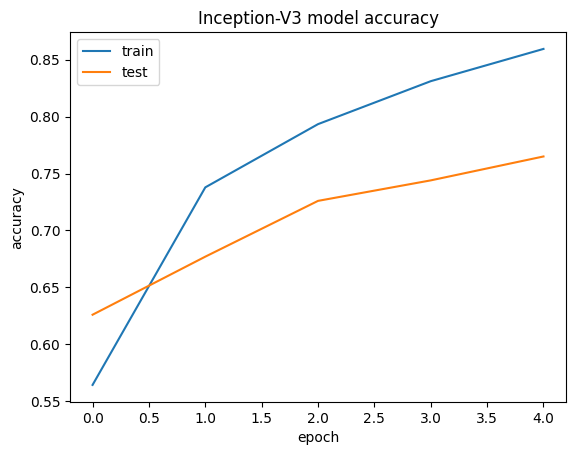

In [ ]:
plt.plot(history_incepV3.history['accuracy'])
plt.plot(history_incepV3.history['val_accuracy'])
plt.title('Inception-V3 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
print('Evaluation Loss:', loss_incepV3)
print('Evaluation Accuracy:', accuracy_incepV3)

Evaluation Loss: 0.7516738772392273
Evaluation Accuracy: 0.7649999856948853


# ResNet

**Deep Residual Network**

* ชื่อเต็มของ ResNet คือ Deep Residual Network ได้รับการนำเสนอครั้ง แรกในงานวิจัยชื่อ Deep Residual Learning for Image Recognition
* ได้รับการอ้างอิง 3,700 ครั้ง ในฐานข้อมูล Scopus
* 41,537 ครั้ง ใน Google Scholar (Jan 2016 — Mar 2020)
* นำเสนอวิธีการแก้ปัญหาเรื่อง **Vanishing gradient** ซึ่งเกิดขึ้นกับโครงข่ายที่ มีความลึกค่อนข้างมาก ด้วยการใส่ทางลัด (shortcut) ลงในโครงข่าย

**Vanishing Gradient**

สมมติว่าผลลัพธ์จากเลเยอร์แบบคอนโวลูชันอันแรกอยู่ในอาเรย์ x ต่อมาเรามี ชั้นคอนโวลูชันสองอันเพิ่มเติมตามมา
โดยปกติผลกระทบจาก x จะเริ่มเลือนหาย ติดตามได้ยากว่าการเปลี่ยน ค่าพารามิเตอร์ในเลเยอร์แรกจะให้ผลอะไร เพราะถูกกลืนไปกับเลเยอร์ถัดมา
เราแก้ปัญหานี้ได้ด้วยการส่งผ่านค่า x ลัดชั้นขึ้นมา แล้วเอาไปบวกกับผล จากเลเยอร์ที่สาม ดังภาพข้างล่างนี้

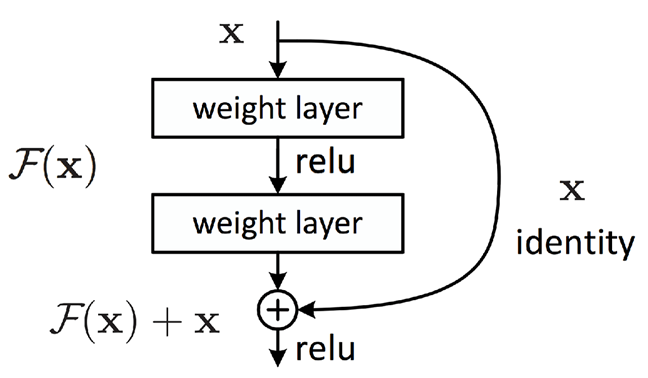

ถ้าโครงข่ายมันลึก เราจะ ทำาซ้ำวิธีการนี้ไปเรื่อย ๆ จนถึงปลายทาง


อย่างไรก็ตามแต่การนำเลเยอร์มาบวกกัน ขนาดต้องเท่ากัน

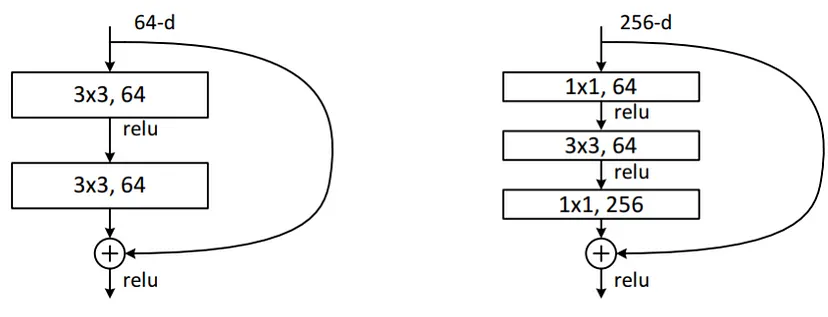

* พิจารณาโครงข่ายทั้งสอง ทางฝั่งซ้ายนั้นจำนวนฟีทเจอร์แม็พมี 64 เท่ากัน ตลอดสายจึงบวกกันได้ทันที แต่ทางขวา เริ่มมามี 256 แล้วลดเหลือ 64
* เราปรับจำนวนฟีทเจอร์แม็พด้วยการใช้ฟิลเตอร์ขนาด 1x1 ได้
* โครงสร้างการปรับจำนวนไปมาแบบนี้ เราเรียกว่า **bottleneck building block**

**ResNet101V2**
เป็นโมเดล convolutional neural network (CNN) ที่ถูกพัฒนามาจากทีมวิจัยใน Microsoft Research โดยมีจุดประสงค์เพื่อใช้ในการแก้ไขปัญหาการจำแนกภาพ โดยมีความลึกของโมเดลถึง 101 ชั้น และใช้วิธีการ residual learning เพื่อลดปัญหา gradient vanishing/exploding ที่เกิดขึ้นในโครงข่ายลึก (deep neural network) ด้วยการใช้สิ่งที่เรียกว่า **"residual blocks" หรือ "skip connections"** เพื่อผ่านข้อมูลผ่านโมเดลได้โดยไม่สูญเสียข้อมูลหรือความรู้ที่มีค่าอย่างมาก.

**ResNet101V2 เป็นการปรับปรุงของ ResNet101**
 โดยใช้เทคนิคที่ทำให้โมเดลมีประสิทธิภาพในการทำนายและใช้ทรัพยากรในการฝึกมากขึ้น

มีคุณสมบัติที่สำคัญคือ:

* **Identity Mapping (ทำให้ง่ายในการเรียนรู้):** ResNet101V2 ใช้ skip connections หรือ "shortcut connections" ในแต่ละ residual block เพื่อให้ข้อมูลสามารถผ่านโมเดลได้โดยไม่มีการแปลงเป็นรูปแบบที่ซับซ้อนขึ้น นี่คือคุณสมบัติ "identity mapping" ที่ช่วยให้โมเดลทำงานได้อย่างเป็นประสิทธิภาพ.

* **Bottleneck Architecture:** ResNet101V2 ใช้โครงสร้าง bottleneck ใน residual block ที่ช่วยลดการใช้ทรัพยากรในการคำนวณ โดยใช้ convolutional layers ที่มีขนาดเล็กก่อนและหลัง convolutional layer ที่มีขนาดใหญ่เพื่อลดความซับซ้อนของการคำนวณและลดการใช้หน่วยความจำ.

* **Pre-Activation:** ResNet101V2 ใช้ "pre-activation" ใน residual block ที่ช่วยลดปัญหา gradient vanishing และทำให้โมเดลสามารถฝึกได้ดีขึ้น

ResNet101V2 เป็นโมเดลที่มีความซับซ้อนและมีความสามารถในการทำนายภาพที่มีความซับซ้อนได้ดี มักถูกนำมาใช้ในงานที่เกี่ยวข้องกับการประมวลผลภาพ เช่น การจำแนกหมวดหมู่วัตถุในภาพ, การตรวจจับวัตถุ, การวิเคราะห์ภาพแผนที่, และงานที่เกี่ยวข้องกับการประมวลผลภาพและวิดีโอในอุตสาหกรรมต่าง ๆ อีกด้วย

In [ ]:
# โหลดโมเดล ResNet101V2 ที่ถูกเทรนไว้ล่วงหน้าด้วยชุดข้อมูล ImageNet จาก TensorFlow Keras
# weights='imagenet': ใช้น้ำหนัก (weights) ที่ถูกเทรนไว้ล่วงหน้าบนโมเดล ResNet101V2 เพื่อให้โมเดลมีความรู้เรื่องวัตถุในรูปภาพจาก ImageNet
# ไม่รวมชั้น Fully Connected Layer ที่อยู่บนส่วนสุดท้ายของโมเดล (ส่วนที่ใช้ในการจำแนกหมวดหมู่) เพื่อให้เราสร้างชั้นใหม่สำหรับงานของเรา
rn101 = tf.keras.applications.ResNet101V2(weights='imagenet',include_top=False,input_shape=input_shape)

#เข้าถึง output (ผลลัพธ์) ของชั้นสุดท้ายของโมเดล ResNet101V2 ที่ถูกโหลดมาในตัวแปร rn101 และเก็บเป็นตัวแปร x
x = rn101.layers[-1].output

#เพิ่มชั้น Global Average Pooling บน tensor x ซึ่งเป็น output ของโมเดล ResNet101V2 หลังจากที่ผ่านชั้น convolution และส่วนอื่น ๆ ของโมเดล
#Global Average Pooling ทำให้เราได้เวกเตอร์ feature ที่เป็นเสมือนภาพที่ถูกสกัดลักษณะที่สำคัญออกมาจากภาพ
x = tf.keras.layers.GlobalAveragePooling2D()(x)

#เพิ่มชั้น Dropout โดยกำหนดอัตราการปิด (dropout rate) เป็น 25% เพื่อลดความเสี่ยงในการเกิดการเรียนรู้ที่เกินมา (overfitting)
x = tf.keras.layers.Dropout(0.25)(x)

#เพิ่มชั้น Dense ที่มี 1024 โหนดและใช้ฟังก์ชัน activation 'relu'
x = tf.keras.layers.Dense(1024,activation='relu')(x)

#เพิ่มชั้น Dropout โดยกำหนดอัตราการปิด (dropout rate) เป็น 25% เพื่อลดความเสี่ยงในการเกิดการเรียนรู้ที่เกินมา (overfitting)
x = tf.keras.layers.Dropout(0.25)(x)

#เพิ่มชั้น Dense ที่มี 10 โหนดและใช้ฟังก์ชัน activation 'softmax'
x =  tf.keras.layers.Dense(10, activation='softmax')(x)

#สร้างโมเดลใหม่นี้จะมีชั้นที่เราปรับแต่งและชั้น input เหมือนกับ ResNet101V2 แต่ output layer จะเป็นตามที่เรากำหนดไว้
model_rn101 = tf.keras.Model(rn101.input,x)

#ทำการคอมไพล์โมเดลโดย
#optimizer เป็น 'adam' ที่เป็นเทคนิคการคำนวณค่าความคลาดเคลื่อนระหว่างการฝึกแบบอัตโนมัติ
#loss function เป็น 'SparseCategoricalCrossentropy' ที่ใช้ในการคำนวณค่าความสูญเสียของโมเดล
#metrics วัดผล เป็น (accuracy)
model_rn101.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

#แสดงสรุปของโมเดลที่รวมถึงจำนวนของพารามิเตอร์และโครงสร้างของแต่ละชั้น
model_rn101.summary()

171317808/171317808 [==============================] - 5s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 134, 134, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 64, 64, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 66, 66, 64)           0         ['conv1_conv[0][0]']          
                           

train โมเดล ResNet ด้วยข้อมูลการฝึกอบรม (Xtrain, Ytrain) โดยใช้การฝึกเป็นเวลา 5 epochs และ batch size คือ 32 เพื่อแบ่งข้อมูลเป็นชุดละ 32 รูปในตอนที่ปป้อนให้กับโมเดล

In [ ]:
history_ResNet = model_rn101.fit(Xtrain, Ytrain, epochs=5, batch_size=32, validation_data=(Xtest, Ytest), verbose=True)
loss_ResNet, accuracy_ResNet = model_rn101.evaluate(Xtest, Ytest, verbose=0)

Epoch 1/5
469/469 [==============================] - 186s 210ms/step - loss: 1.5289 - accuracy: 0.4501 - val_loss: 1.8167 - val_accuracy: 0.4610
Epoch 2/5
469/469 [==============================] - 92s 196ms/step - loss: 1.0035 - accuracy: 0.6537 - val_loss: 3.4250 - val_accuracy: 0.3170
Epoch 3/5
469/469 [==============================] - 93s 197ms/step - loss: 0.7715 - accuracy: 0.7379 - val_loss: 1.0073 - val_accuracy: 0.6850
Epoch 4/5
469/469 [==============================] - 92s 196ms/step - loss: 0.6432 - accuracy: 0.7808 - val_loss: 0.9637 - val_accuracy: 0.6690
Epoch 5/5
469/469 [==============================] - 92s 196ms/step - loss: 0.5138 - accuracy: 0.8247 - val_loss: 0.9021 - val_accuracy: 0.7370


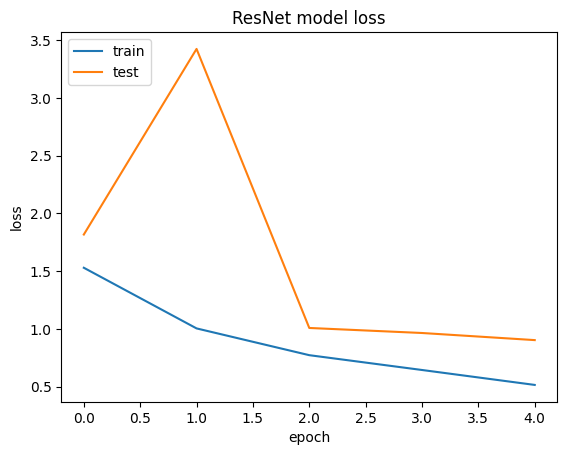

In [ ]:
plt.plot(history_ResNet.history['loss'])
plt.plot(history_ResNet.history['val_loss'])
plt.title('ResNet model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

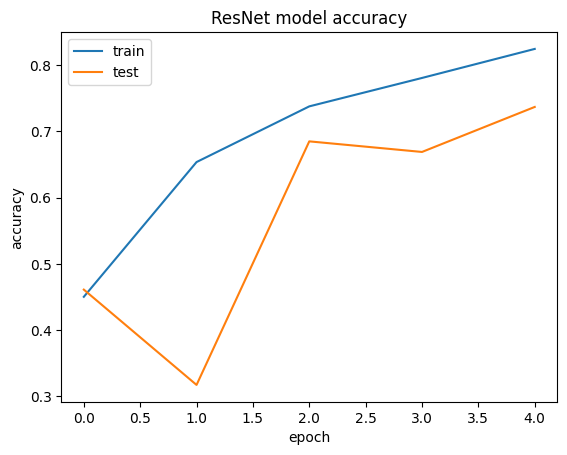

In [ ]:
plt.plot(history_ResNet.history['accuracy'])
plt.plot(history_ResNet.history['val_accuracy'])
plt.title('ResNet model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
print('Evaluation Loss:', loss_ResNet)
print('Evaluation Accuracy:', accuracy_ResNet)

Evaluation Loss: 0.9020869135856628
Evaluation Accuracy: 0.7369999885559082


# DenseNet

DenseNet และ DenseNet201 เป็นสองโมเดล Convolutional Neural Network (CNN) ที่อยู่ในครอบครัวเดียวกัน แต่มีความแตกต่างในประสิทธิภาพและขนาดของโมเดลดังนี้:

1. **จำนวนชั้น (Number of Layers)**:
   - **DenseNet**: DenseNet หมายถึงโมเดลเบื้องต้น (Original DenseNet) ซึ่งมีสามเวอร์ชันหลักคือ DenseNet-121, DenseNet-169, และ DenseNet-201 โดยแต่ละเวอร์ชันแตกต่างกันในจำนวนชั้นที่ถูกสร้างขึ้น ตัวเลขที่ตามหลังชื่อระบุจำนวนของ convolutional layers ที่ถูกใช้ในโมเดล (เช่น DenseNet-121 มี 121 ชั้น).
   - **DenseNet201**: เป็นเวอร์ชันที่ใช้ DenseNet แต่มีจำนวนชั้นที่มากกว่าและมากที่สุดในครอบครัว DenseNet ซึ่งมีจำนวนชั้น convolutional มากกว่าในการเรียนรู้คุณลักษณะของภาพ.

2. **จำนวนพารามิเตอร์ (Number of Parameters)**:
   - **DenseNet**: รุ่นเบื้องต้นของ DenseNet (DenseNet-121) มีจำนวนพารามิเตอร์น้อยกว่าแบบเวอร์ชันที่มากกว่า เนื่องจากมีจำนวนชั้นน้อยกว่า แต่จำนวนพารามิเตอร์ยังคงเป็นจำนวนมาก ทำให้เหมาะสำหรับการใช้งานในความลึกของโครงข่ายที่มากกว่าหรือในทรัพยากรที่จำกัด.
   - **DenseNet201**: รุ่น DenseNet201 มีจำนวนพารามิเตอร์มากกว่าเนื่องจากมีจำนวนชั้น convolutional มากขึ้น ซึ่งทำให้ความสามารถในการเรียนรู้คุณลักษณะของภาพเพิ่มขึ้น แต่ก็ทำให้มีความจำเป็นในทรัพยากรคำนวณ (computational resources) และหน่วยความจำมากกว่า.

3. **ประสิทธิภาพ (Performance)**:
   - **DenseNet201**: เนื่องจากมีจำนวนชั้นและพารามิเตอร์มากกว่า โมเดล DenseNet201 มักมีประสิทธิภาพที่ดีกว่าในการจำแนกหมวดหมู่ของภาพ และมักถูกนำมาใช้ในงานที่ต้องการความแม่นยำและการระบุคุณลักษณะของภาพอย่างละเอียด เช่น การตรวจจับวัตถุ, การประมวลผลภาพและวิดีโอในงานวิจัยและอุตสาหกรรมต่าง ๆ ซึ่งต้องการความสามารถในการระบุคุณลักษณะของภาพที่ซับซ้อน.

สรุป: DenseNet และ DenseNet201 เป็นโมเดล CNN ที่มีความสามารถและประสิทธิภาพที่แตกต่างกัน โดย DenseNet201 มีประสิทธิภาพที่ดีกว่าและมีจำนวนชั้นและพารามิเตอร์มากกว่า ดังนั้นจึงเหมาะสำหรับงานที่ต้องการความแม่นยำและการระบุคุณลักษณะของภาพที่ซับซ้อน เช่น การตรวจจับวัตถุหรืองานวิจัยในด้านคอมพิวเตอร์วิทยาชั้นสูง.

DenseNet201 เป็นโมเดล Convolutional Neural Network (CNN) ที่ถูกพัฒนาขึ้นโดยทีมวิจัยใน Microsoft Research และเป็นส่วนหนึ่งของครอบครัวของโมเดล DenseNet (Densely Connected Convolutional Networks) โดยเป็นการพัฒนาต่อจากโมเดล DenseNet-121 เพื่อเพิ่มความลึกและความสามารถในการสร้างความเชื่อมโยงระหว่างชั้นของโครงข่ายอัตโนมัติเพื่อทำนายข้อมูลภาพได้อย่างมีประสิทธิภาพมากขึ้น.

DenseNet201 มีคุณสมบัติที่สำคัญคือ:

1. **Dense Connectivity**: โมเดลนี้ใช้ความสัมพันธ์ระหว่างชั้น (layer) ที่เรียกว่า "dense connectivity" โดยในแต่ละชั้นจะมีการเชื่อมโยงกับชั้นก่อนหน้าทุกชั้น ทำให้ข้อมูลสามารถถ่ายทอดไปถึงชั้นที่ห่างออกไปได้โดยตรง ทำให้เกิดการเรียนรู้แบบแบ่งปันข้อมูลและความเชื่อมโยงที่เข้มข้น.

2. **Bottleneck Architecture**: โมเดลใช้โครงสร้าง bottleneck ใน residual block เพื่อลดความสูญเสียของข้อมูลและลดการใช้ทรัพยากรในการคำนวณ โดยการใช้ convolutional layers ที่มีขนาดเล็กก่อนและหลัง convolutional layer ที่มีขนาดใหญ่.

3. **Transition Layers**: DenseNet201 มีชั้นที่เรียกว่า "transition layers" ที่ใช้ในการลดขนาดของ feature maps ระหว่าง residual blocks เพื่อลดการใช้หน่วยความจำและทรัพยากรในการคำนวณ.

4. **Growth Rate**: Growth rate คือจำนวนของ feature maps ที่เพิ่มขึ้นทุกครั้งเมื่อมีการเพิ่ม residual block เข้ามา โดย DenseNet201 มี growth rate ที่สูง ซึ่งช่วยให้โมเดลสามารถเรียนรู้ลักษณะของข้อมูลได้อย่างมากขึ้น.

5. **Pre-Activation**: DenseNet201 ใช้ "pre-activation" ใน residual block เพื่อลดปัญหา gradient vanishing และ gradient exploding ที่เกิดขึ้นในโครงข่ายลึก.

DenseNet201 เป็นโมเดลที่มีความสามารถในการจำแนกหมวดหมู่ของภาพอย่างมีประสิทธิภาพและมักถูกนำมาใช้ในงานที่เกี่ยวข้องกับการประมวลผลภาพ เช่น การจำแนกวัตถุในภาพ, การตรวจจับวัตถุ, การวิเคราะห์ภาพแผนที่, การค้นหาภาพ, และงานที่เกี่ยวข้องกับการประมวลผลภาพและวิดีโอในอุตสาหกรรมต่าง ๆ อีกด้วย.

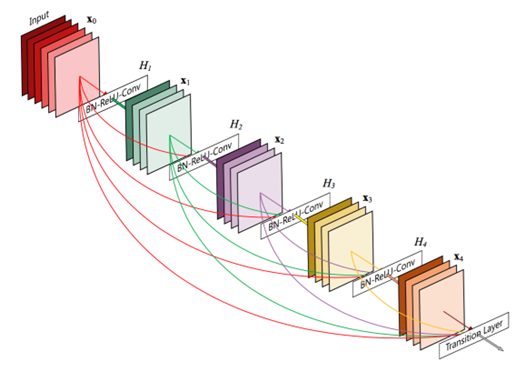

In [ ]:
# โหลดโมเดล DenseNet121 ที่ถูกเทรนไว้ล่วงหน้าด้วยชุดข้อมูล ImageNet จาก TensorFlow Keras
# weights='imagenet': ใช้น้ำหนัก (weights) ที่ถูกเทรนไว้ล่วงหน้าบนโมเดล DenseNet121 เพื่อให้โมเดลมีความรู้เรื่องวัตถุในรูปภาพจาก ImageNet
# ไม่รวมชั้น Fully Connected Layer ที่อยู่บนส่วนสุดท้ายของโมเดล (ส่วนที่ใช้ในการจำแนกหมวดหมู่) เพื่อให้เราสร้างชั้นใหม่สำหรับงานของเรา
dn121 = tf.keras.applications.DenseNet121(weights='imagenet',include_top=False,input_shape=input_shape)

#เข้าถึง output ของโมเดล DenseNet121 ที่ถูกโหลดมา (ที่เก็บในตัวแปร dn121) และเก็บเป็นตัวแปร x
x = dn121.layers[-1].output

#เพิ่มชั้น Global Average Pooling ซึ่งเป็น output ของโมเดล DenseNet121 หลังจากที่ผ่านชั้น convolution และส่วนอื่น ๆ ของโมเดล
#Global Average Pooling ทำให้เราได้เวกเตอร์ feature ที่เป็นเสมือนภาพที่ถูกสกัดลักษณะที่สำคัญออกมาจากภาพ
x = tf.keras.layers.GlobalAveragePooling2D()(x)

#เพิ่มชั้น Dropout โดยกำหนดอัตราการปิด (dropout rate) เป็น 25% เพื่อลดความเสี่ยงในการเกิดการเรียนรู้ที่เกินมา (overfitting)
#x = tf.keras.layers.Dropout(0.25)(x)

#เพิ่มชั้น Dense ที่มี 1024 โหนดและใช้ฟังก์ชัน activation ชื่อ 'relu'
x = tf.keras.layers.Dense(1024,activation='relu')(x)

#เพิ่มชั้น Dropout โดยกำหนดอัตราการปิด (dropout rate) เป็น 25% เพื่อลดความเสี่ยงในการเกิดการเรียนรู้ที่เกินมา (overfitting)
#x = tf.keras.layers.Dropout(0.25)(x)

#เพิ่มชั้น Dense ที่มี 1024 โหนดและใช้ฟังก์ชัน activation ชื่อ 'softmax'
x =  tf.keras.layers.Dense(10,activation='softmax')(x)

#สร้างโมเดลใหม่โดยใช้ input layer ของ DenseNet121 (dn201.input) และ output layer ที่ผ่านขั้นตอนการปรับแต่งทั้งหมดข้างต้น (Global Average Pooling, Dropout, Dense) เพื่อให้โมเดลเราสามารถใช้ในการจำแนกหมวดหมู่รูปภาพ
#โมเดลใหม่นี้จะมีชั้นที่เราปรับแต่งและชั้น input เหมือนกับ DenseNet201 แต่ output layer จะเป็นตามที่เรากำหนดไว้.
model_dn121 = tf.keras.Model(dn121.input,x)

#ทำการคอมไพล์โมเดลโดย
#optimizer เป็น 'adam' ที่เป็นเทคนิคการคำนวณค่าความคลาดเคลื่อนระหว่างการฝึกแบบอัตโนมัติ
#loss function เป็น 'SparseCategoricalCrossentropy' ที่ใช้ในการคำนวณค่าความสูญเสียของโมเดล
#metrics วัดผล เป็น (accuracy)
model_dn121.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

#แสดงสรุปของโมเดลที่รวมถึงจำนวนของพารามิเตอร์และโครงสร้างของแต่ละชั้น
model_dn121.summary()

29084464/29084464 [==============================] - 3s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 134, 134, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 64, 64, 64)           9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  

train โมเดล DenseNet ด้วยข้อมูลการฝึกอบรม (Xtrain, Ytrain) โดยใช้การฝึกเป็นเวลา 5 epochs และ batch size คือ 32 เพื่อแบ่งข้อมูลเป็นชุดละ 32 รูปในตอนที่ปป้อนให้กับโมเดล

In [ ]:
history_DenseNet = model_dn121.fit(Xtrain, Ytrain, epochs=5, batch_size=32, validation_data=(Xtest, Ytest), verbose=True)
loss_DenseNet, accuracy_DenseNet = model_dn121.evaluate(Xtest, Ytest, verbose=0)

Epoch 1/5
469/469 [==============================] - 165s 162ms/step - loss: 0.9249 - accuracy: 0.6923 - val_loss: 7.1053 - val_accuracy: 0.2620
Epoch 2/5
469/469 [==============================] - 65s 139ms/step - loss: 0.5741 - accuracy: 0.8087 - val_loss: 0.9672 - val_accuracy: 0.6930
Epoch 3/5
469/469 [==============================] - 65s 139ms/step - loss: 0.4462 - accuracy: 0.8501 - val_loss: 0.6706 - val_accuracy: 0.7830
Epoch 4/5
469/469 [==============================] - 66s 140ms/step - loss: 0.3685 - accuracy: 0.8720 - val_loss: 0.6223 - val_accuracy: 0.8070
Epoch 5/5
469/469 [==============================] - 65s 138ms/step - loss: 0.3228 - accuracy: 0.8916 - val_loss: 0.6898 - val_accuracy: 0.8020


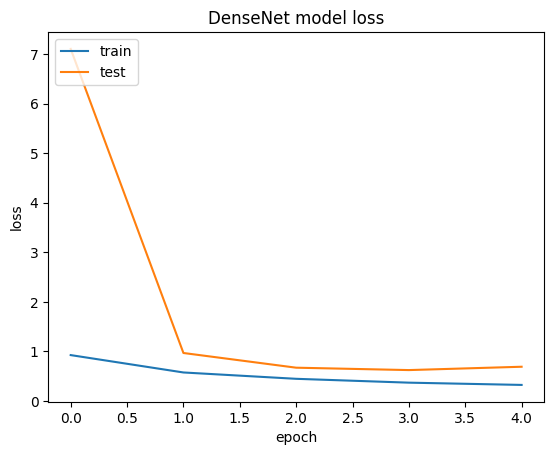

In [ ]:
plt.plot(history_DenseNet.history['loss'])
plt.plot(history_DenseNet.history['val_loss'])
plt.title('DenseNet model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

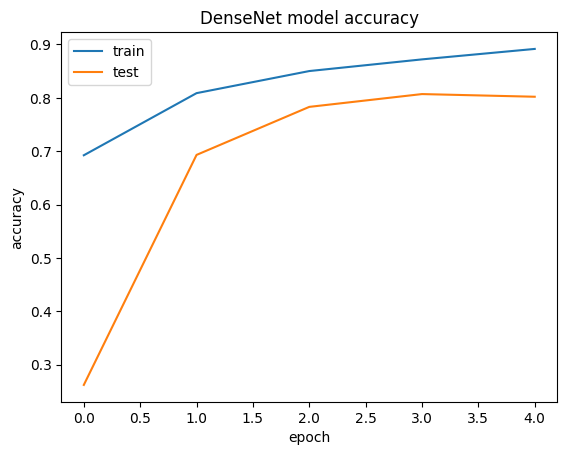

In [ ]:
plt.plot(history_DenseNet.history['accuracy'])
plt.plot(history_DenseNet.history['val_accuracy'])
plt.title('DenseNet model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
print('Evaluation Loss:', loss_DenseNet)
print('Evaluation Accuracy:', accuracy_DenseNet)

Evaluation Loss: 0.689765989780426
Evaluation Accuracy: 0.8019999861717224


# Comparison Evaluation

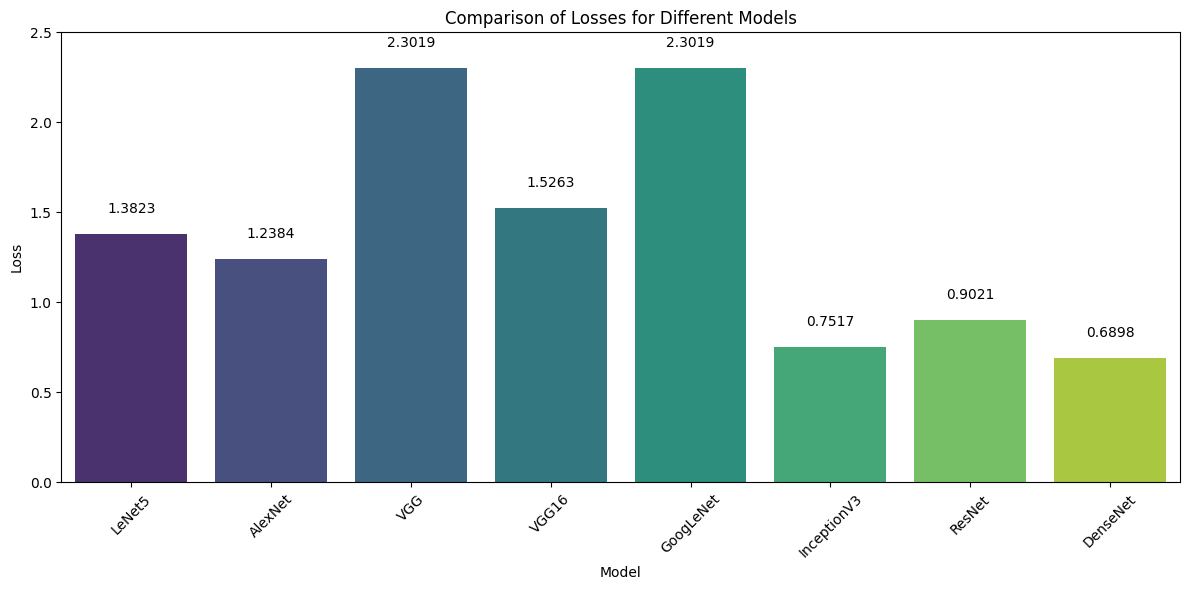

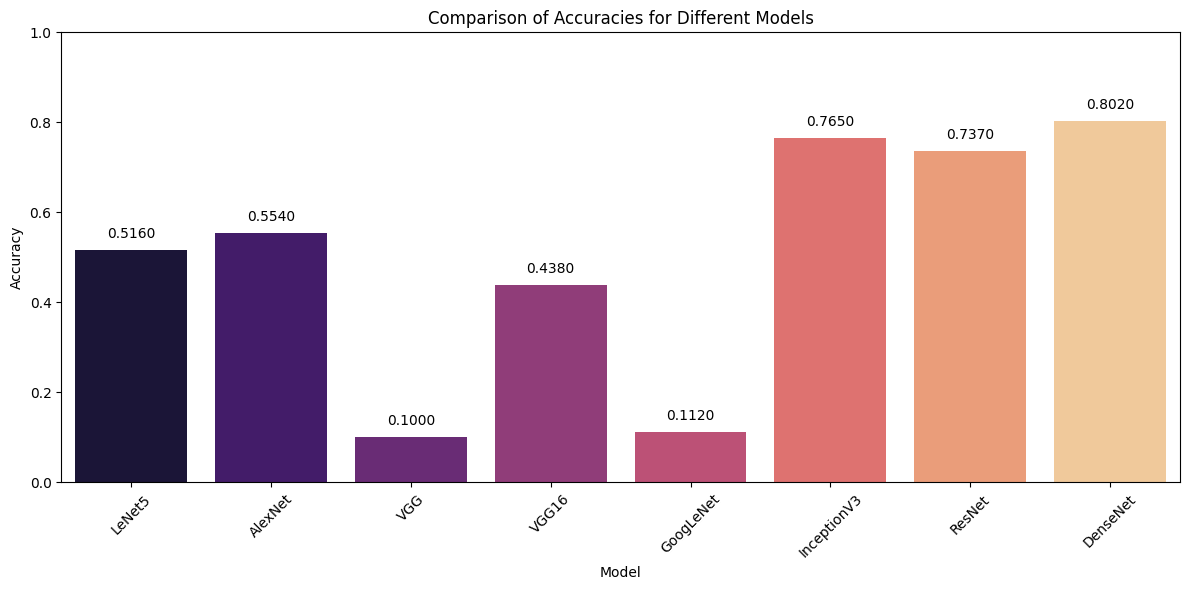

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# สร้าง DataFrame เพื่อเก็บข้อมูล loss และ accuracy ของแต่ละโมเดล
data = {
    'Model': ['LeNet5', 'AlexNet', 'VGG', 'VGG16', 'GoogLeNet', 'InceptionV3', 'ResNet', 'DenseNet'],
    'Loss': [1.3823, 1.2384, 2.3019, 1.5263, 2.3019, 0.7517, 0.9021, 0.6898],
    'Accuracy': [0.5160, 0.5540, 0.1000, 0.4380, 0.1120, 0.7650, 0.7370, 0.8020]
}

df = pd.DataFrame(data)

# สร้างกราฟเปรียบเทียบค่า loss แต่ละโมเดล
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Loss', data=df, palette='viridis')
plt.title('Comparison of Losses for Different Models')
plt.xlabel('Model')
plt.ylabel('Loss')
plt.xticks(rotation=45)
plt.ylim(0, 2.5)

# แสดงค่า loss บนแท่งกราฟ
for index, row in df.iterrows():
    plt.text(index, row['Loss'] + 0.1, f"{row['Loss']:.4f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# สร้างกราฟเปรียบเทียบค่า accuracy แต่ละโมเดล
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', data=df, palette='magma')
plt.title('Comparison of Accuracies for Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# แสดงค่า accuracy บนแท่งกราฟ
for index, row in df.iterrows():
    plt.text(index, row['Accuracy'] + 0.02, f"{row['Accuracy']:.4f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
